In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from fcmeans import FCM

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score, \
                            adjusted_rand_score, \
                            homogeneity_score, \
                            completeness_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
import trimap
import pacmap
import umap

from ucimlrepo import fetch_ucirepo 

import warnings

warnings.filterwarnings("ignore")

In [2]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [3]:
na_index = X.loc[X.isna().any(axis=1)].index.tolist()

In [4]:
y_proc = y.drop(index=na_index)
X_proc = X.drop(index=na_index)

In [100]:
data1_X = X_proc
data1_y = y_proc

In [101]:
data1_X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0


In [8]:
rscaler = RobustScaler().fit(data1_X)
scaled_data = rscaler.transform(data1_X)

distance_mat = {}

In [106]:
scaled_data = data1_X

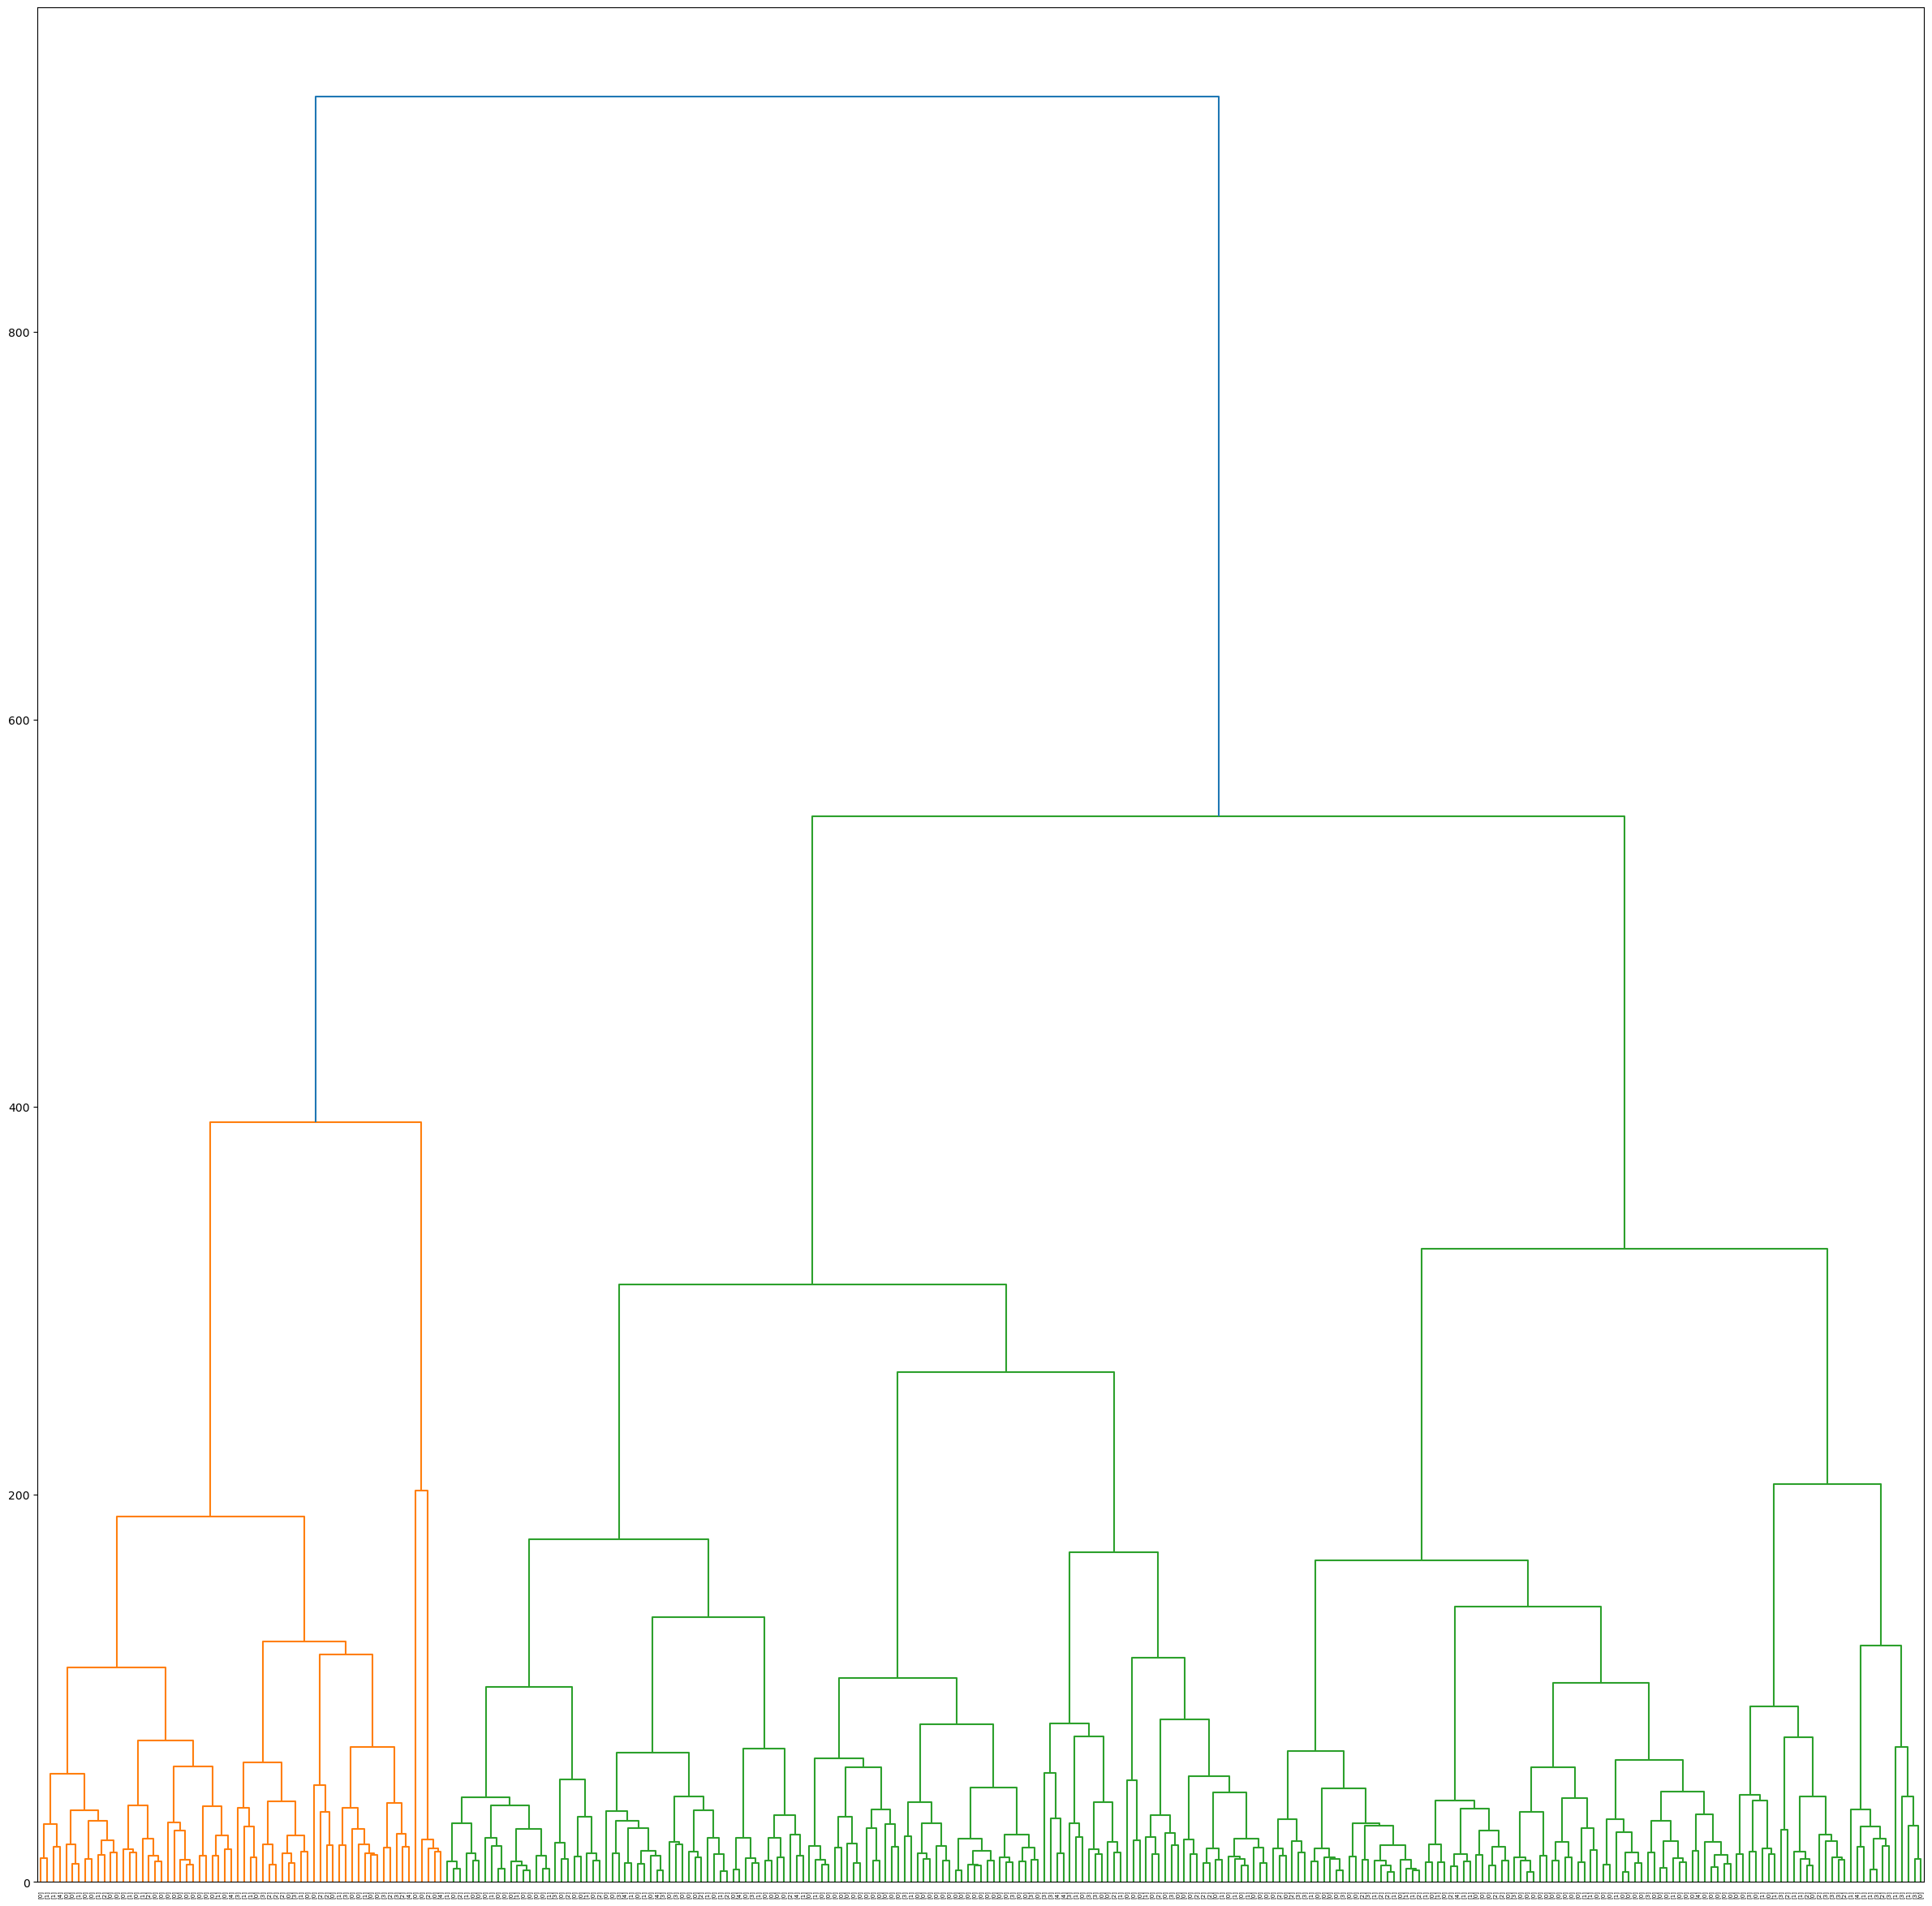

In [107]:
distance_mat["ward"] = linkage(scaled_data,
                       method="ward",
                       metric="euclidean")
fig = plt.figure(figsize=(30,30))

R = dendrogram(distance_mat["ward"],
              labels=data1_y.values)

plt.show()

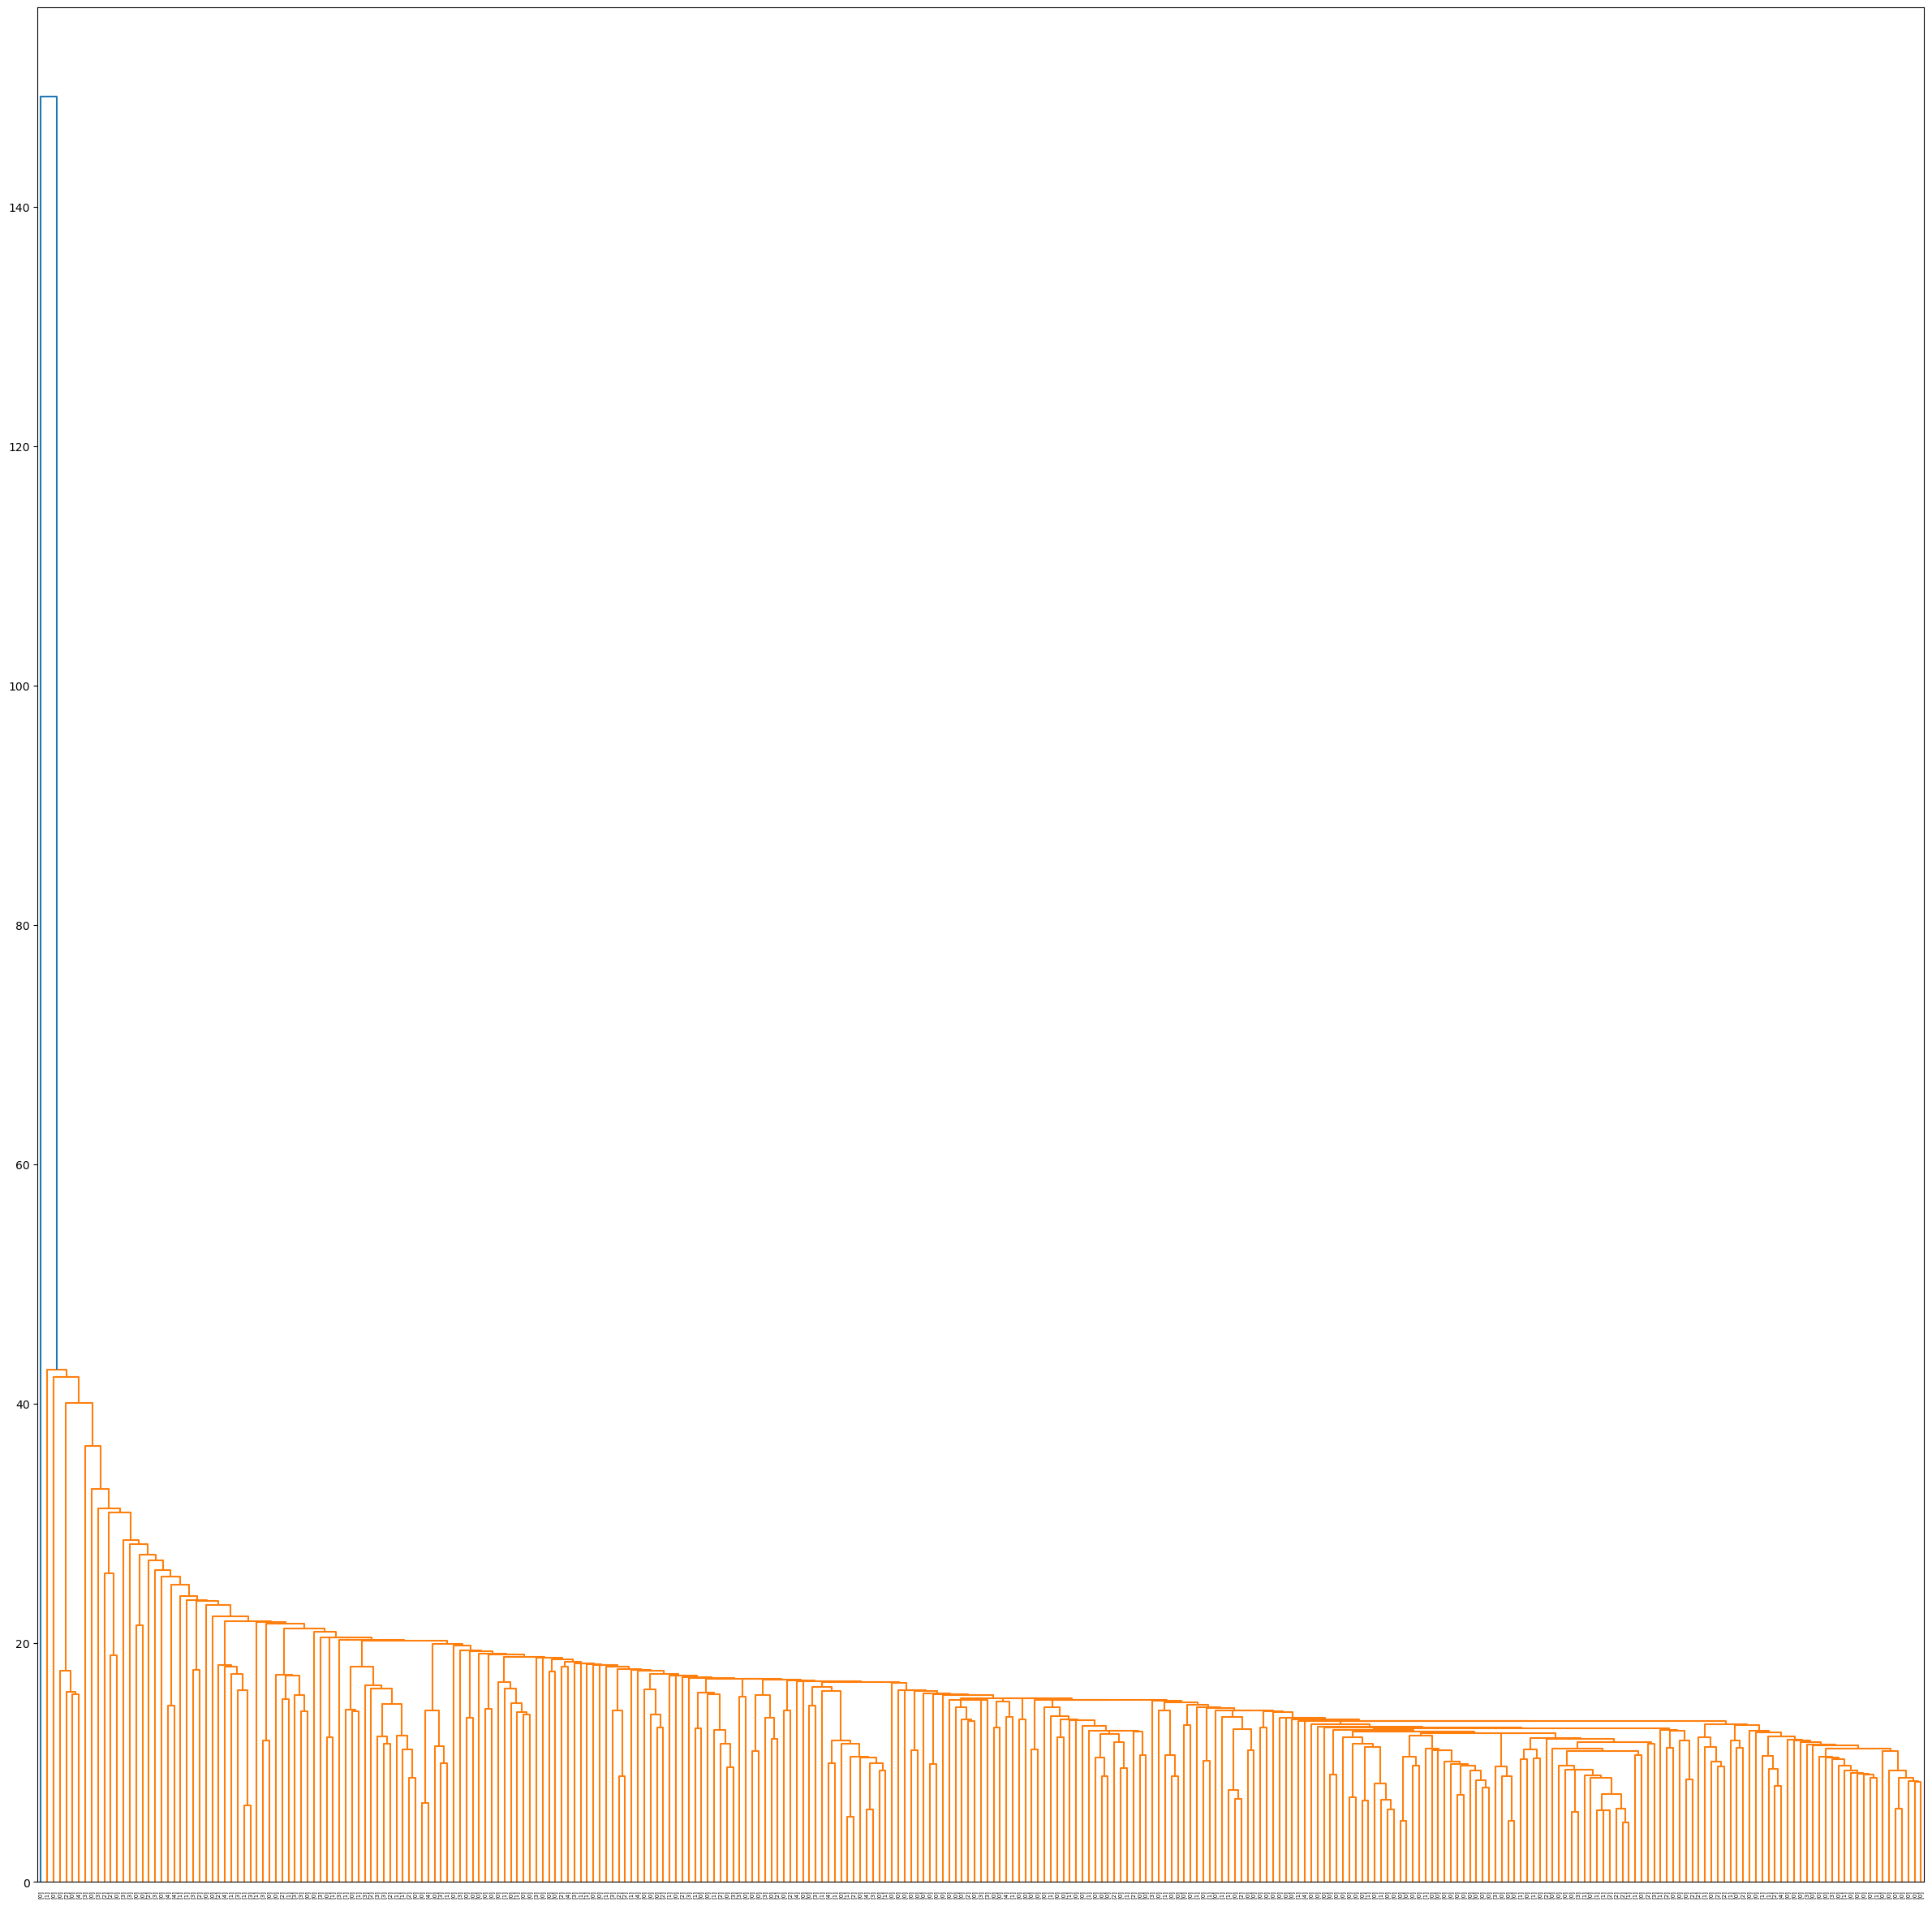

In [108]:
distance_mat["single"] = linkage(scaled_data,
                       method="single",
                       metric="euclidean")
fig = plt.figure(figsize=(30,30))

R = dendrogram(distance_mat["single"],
              labels=data1_y.values)

plt.show()

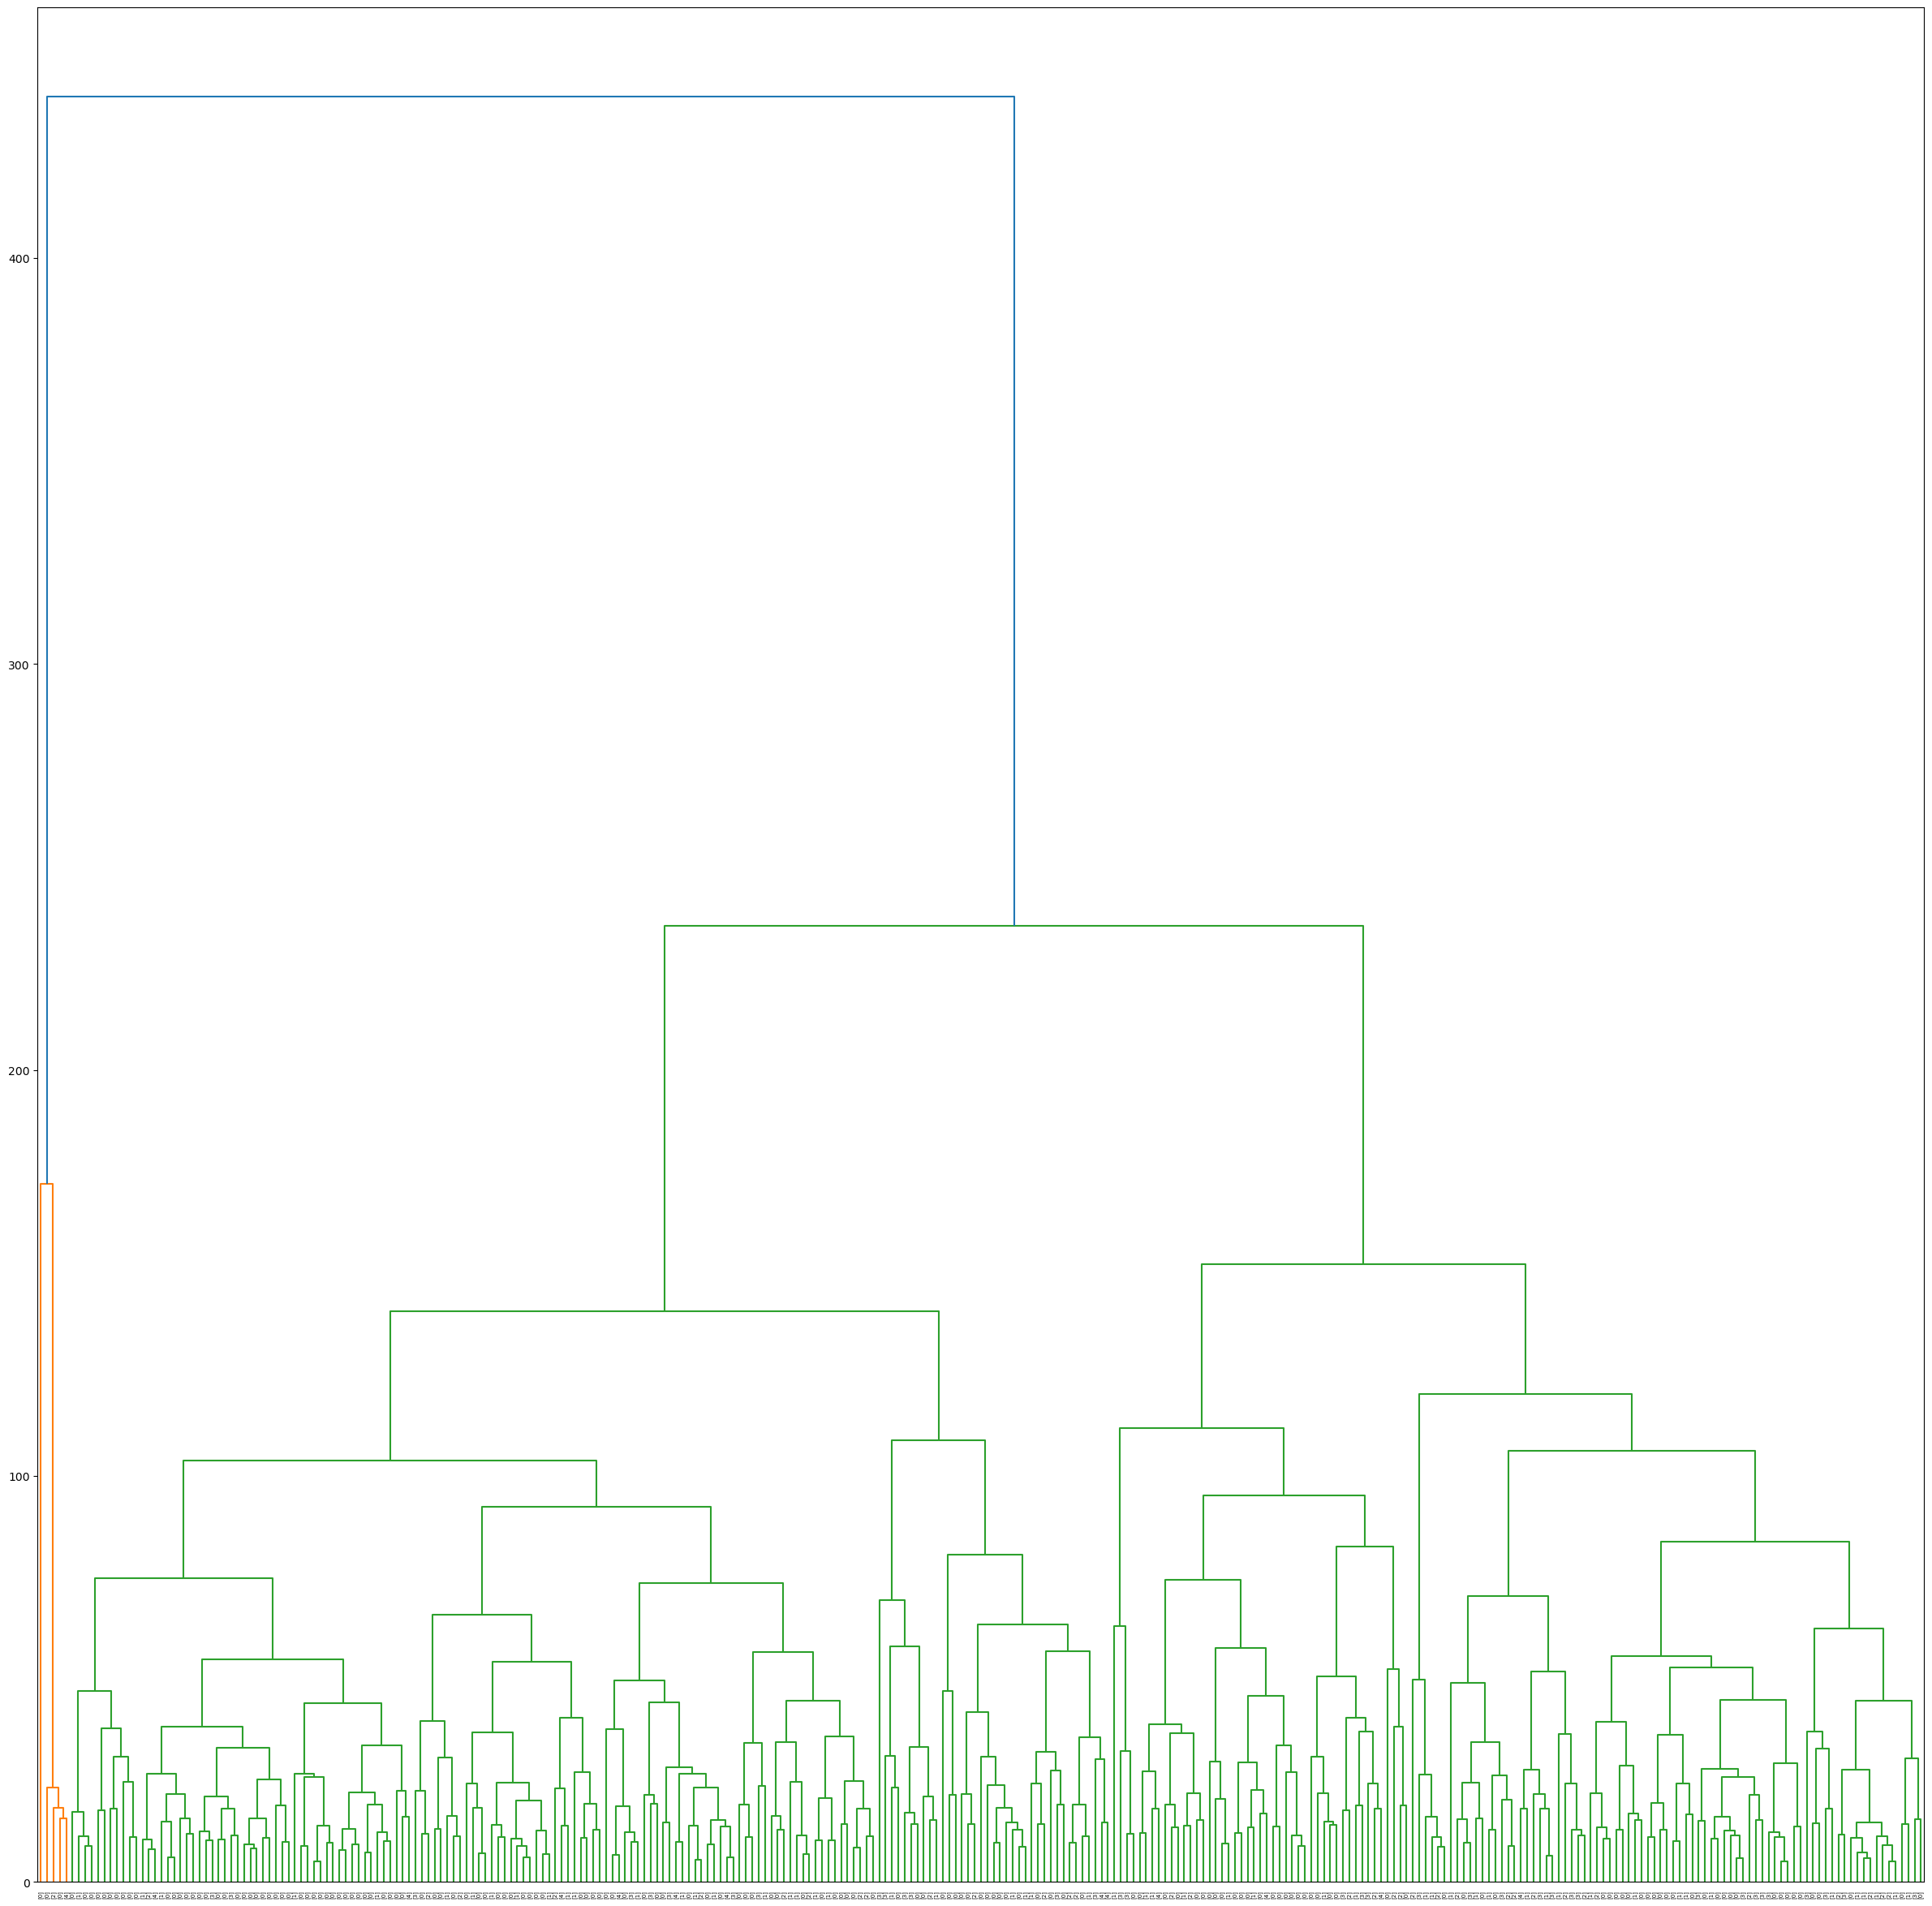

In [109]:
distance_mat["complete"] = linkage(scaled_data,
                       method="complete",
                       metric="euclidean")
fig = plt.figure(figsize=(30,30))

R = dendrogram(distance_mat["complete"],
              labels=data1_y.values)

plt.show()

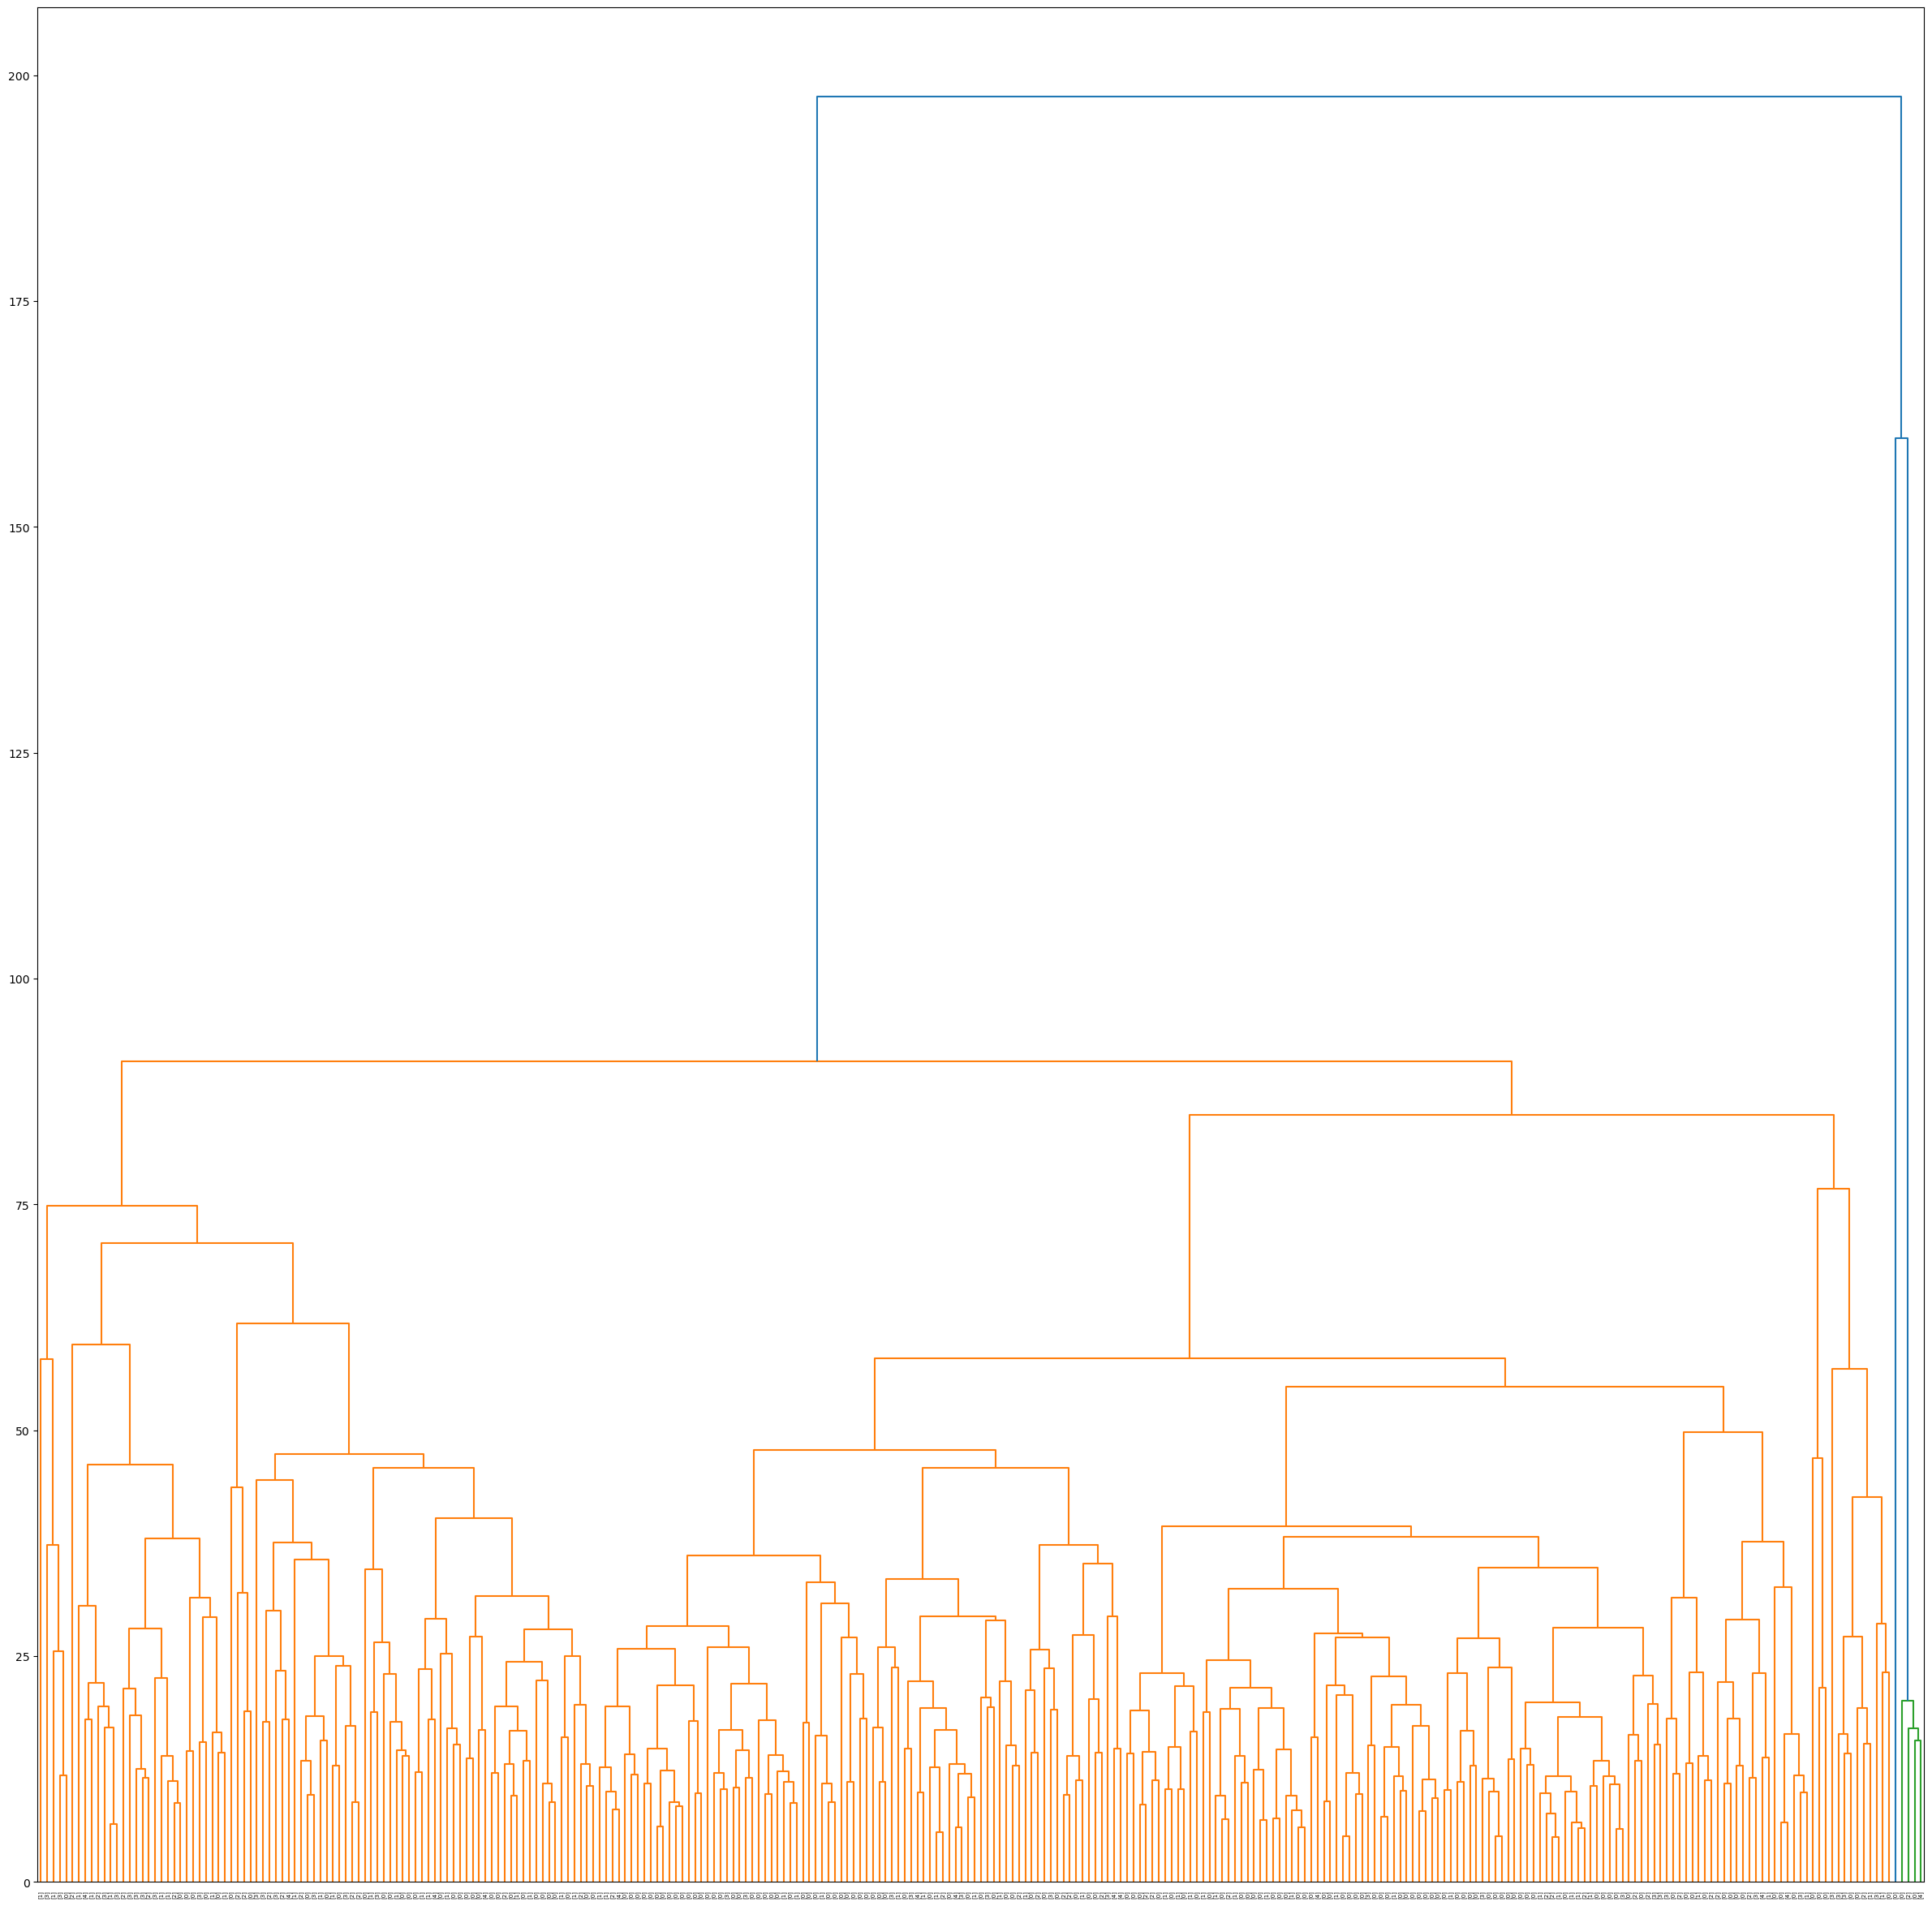

In [110]:
distance_mat["average"] = linkage(scaled_data,
                       method="average",
                       metric="euclidean")
fig = plt.figure(figsize=(30,30))

R = dendrogram(distance_mat["average"],
              labels=data1_y.values)

plt.show()

In [111]:
data1_y

,num
0,0
1,2
2,1
3,0
4,0
...,...
297,1
298,1
299,2
300,3


In [116]:
scaled_data = scaled_data.to_numpy()

In [117]:
scaled_data[:,7]

array([150., 108., 129., 187., 172., 178., 160., 163., 147., 155., 148.,
       153., 142., 173., 162., 174., 168., 160., 139., 171., 144., 162.,
       160., 173., 132., 158., 172., 114., 171., 114., 151., 160., 158.,
       161., 179., 178., 120., 112., 132., 137., 114., 178., 162., 157.,
       169., 165., 123., 128., 157., 152., 168., 140., 153., 188., 144.,
       109., 163., 158., 152., 125., 142., 160., 131., 170., 113., 142.,
       155., 165., 140., 147., 148., 163.,  99., 158., 177., 151., 141.,
       142., 180., 111., 148., 143., 182., 150., 172., 180., 156., 160.,
       149., 151., 145., 146., 175., 172., 161., 142., 157., 158., 186.,
       185., 174., 159., 130., 139., 156., 162., 150., 140., 140., 146.,
       144., 190., 136.,  97., 132., 165., 182., 132., 127., 150., 154.,
       143., 111., 174., 175., 133., 126., 170., 163., 147., 154., 202.,
       186., 165., 161., 125., 103., 130., 166., 164., 159., 184., 131.,
       154., 152., 124., 179., 170., 160., 178., 12

In [118]:
scaled_data[:,1]

array([1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1.

In [119]:
scaled_data[0]

array([ 63. ,   1. ,   1. , 145. , 233. ,   1. ,   2. , 150. ,   0. ,
         2.3,   3. ,   0. ,   6. ])

Text(0.5, 1.0, 'Метки кластеров, найденные алгоритмом ward')

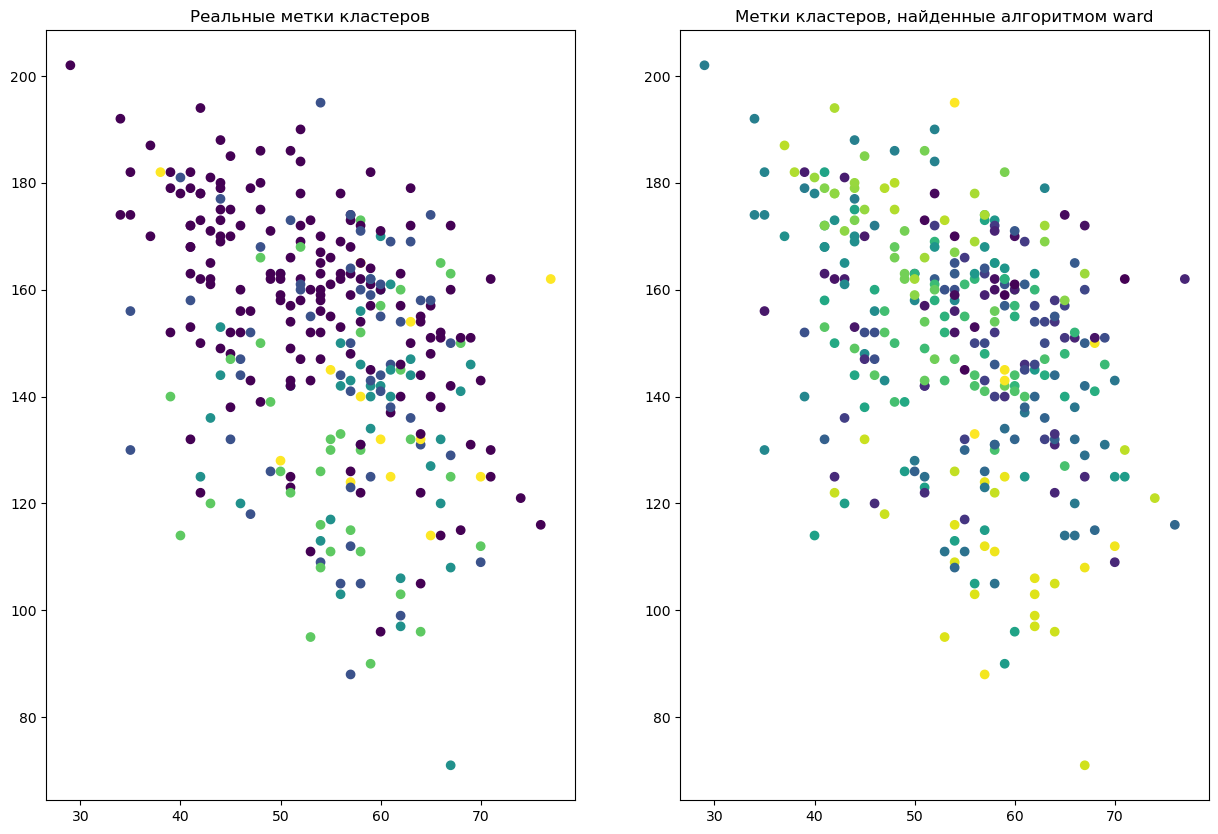

In [120]:
alg = "ward"

df = data1_X[:]

df["cluster"] = fcluster(distance_mat[alg],
                              np.max(np.unique(df)),
                             criterion="maxclust")

df["target"] = data1_y.values

fig, axes = plt.subplots(1,2, figsize=(15,10))

axes[0].scatter(scaled_data[:, 0], scaled_data[:, 7],
               c=df["target"])

axes[1].scatter(scaled_data[:, 0], scaled_data[:, 7],
               c=df["cluster"])

axes[0].set_title("Реальные метки кластеров")
axes[1].set_title(f"Метки кластеров, найденные алгоритмом {alg}")

In [121]:
print(adjusted_rand_score(df["target"], df["cluster"]))
print(homogeneity_score(df["target"], df["cluster"]))
print(completeness_score(df["target"], df["cluster"]))

3.870850852439967e-05
0.996365122242561
0.22508332706997058


In [122]:
# Определение оптимального числа кластеров
def find_optimal_kmeans_clusters(data, max_clusters=15):
    silhouette_scores = []
    WCSS = []
    cluster_labels = []
    
    tmp_df = pd.DataFrame()
    
    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init="k-means++",
                        max_iter=300, n_init=15, random_state = 0)
        kmeans.fit(data)
        tmp_df['cluster_labels']=kmeans.fit_predict(data)
        cluster_labels.append(tmp_df['cluster_labels'])
        WCSS.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data,
                                                  tmp_df['cluster_labels'],
                                                  metric="euclidean"))
    return WCSS, silhouette_scores, cluster_labels

In [123]:
def find_optimal_fuzzy_clusters(data, max_clusters=15):
    silhouette_scores = []
    
    cluster_labels = []
    
    tmp_df = pd.DataFrame()
    
    for i in range(2, max_clusters + 1):
        fcm = FCM(n_clusters=i, m=2)
        fcm.fit(data)
        tmp_df['cluster_labels'] = fcm.predict(data)
        cluster_labels.append(tmp_df['cluster_labels'])
        silhouette_scores.append(silhouette_score(data,
                                                  tmp_df['cluster_labels'],
                                                  metric="euclidean"))
    return silhouette_scores, cluster_labels

In [124]:
def DBDCAN_clusters(data, eps):
    clustering = DBSCAN(eps=eps, min_samples=3).fit(data)
    return clustering.labels_

In [125]:
def calc_metrics(cluster_true, cluster_pred, cluster_num=None):
    if cluster_num is None:
        print("ARI", adjusted_rand_score(cluster_true, cluster_pred))
        print("homogeneity", homogeneity_score(cluster_true, cluster_pred))
        print("completeness", completeness_score(cluster_true, cluster_pred))
    else:
        cluster_num = cluster_num-1
        print("ARI", adjusted_rand_score(cluster_true, cluster_pred[cluster_num]))
        print("homogeneity", homogeneity_score(cluster_true, cluster_pred[cluster_num]))
        print("completeness", completeness_score(cluster_true, cluster_pred[cluster_num]))

In [126]:
def plot_it(data, plot_type, eps=None):
    if plot_type == "k-means":
        elb, silh, cluster_labels = find_optimal_kmeans_clusters(data)
        fig, ax = plt.subplots(1, 2, figsize=(15,5))
        ax[0].plot(range(2,16), elb)
        ax[0].set_title("Elbow")
        ax[1].plot(range(2,16), silh)
        ax[1].set_title("SILH")
    elif plot_type == "fuzzy":
#         fig, ax = plt.subplots(1, 1, figsize=(15,10))
        silh, cluster_labels = find_optimal_fuzzy_clusters(data)
        plt.plot(range(2,16), silh)
        plt.title("SILH")
    elif plot_type == "DBSCAN":
        cluster_labels = DBSCAN(eps=eps, min_samples=40, algorithm='kd_tree').fit_predict(data)
    else: 
        raise Exception("ты дурак")
    
    
    return cluster_labels

In [127]:
def plot_scatter(data, cluster_true, cluster_pred, cluster_num=None):
    fig, axes = plt.subplots(1,2, figsize=(15,10))
    
    
    if cluster_true is None:
        axes[0].scatter(data[:, 0], data[:, 7])
        axes[0].set_title("НЕТ Реальных меткок кластеров")
    else:
        axes[0].scatter(data[:, 0], data[:, 7],
                           c=cluster_true)
        axes[0].set_title("Реальные метки кластеров")
    
    if cluster_num is None:
        axes[1].scatter(data[:, 0], data[:, 7],
                       c=cluster_pred)
    else:
        axes[1].scatter(data[:, 0], data[:, 7],
                       c=cluster_pred[cluster_num])
        
    axes[1].set_title(f"Метки кластеров, найденные алгоритмом")

In [128]:
def plot_reduce(data, y_pred, cluster_index=None):
    
    X_test = data
    
    if cluster_index is not None:
        y_pred = y_pred[cluster_index]

    plt.figure(figsize=(12, 6))

    plt.subplot(2, 4, 1)
    tsne = TSNE(n_components=2, perplexity=10, random_state=42)
    X_tsne = tsne.fit_transform(X_test)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap=plt.cm.Set1)
    plt.title('t-SNE (perplexity=10)')

    plt.subplot(2, 4, 2)
    umap_model = umap.UMAP(n_components=2, min_dist=0.1, random_state=42)
    X_umap = umap_model.fit_transform(X_test)
    plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_pred, cmap=plt.cm.Set1)
    plt.title('UMAP (min_dist=0.99)')

    plt.subplot(2, 4, 3)
    tsne = TSNE(n_components=2, perplexity=40, random_state=42)
    X_tsne = tsne.fit_transform(X_test)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap=plt.cm.Set1)
    plt.title('t-SNE (perplexity=40)')

    plt.subplot(2, 4, 4)
    umap_model = umap.UMAP(n_components=2, min_dist=0.15, random_state=42)
    X_umap = umap_model.fit_transform(X_test)
    plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_pred, cmap=plt.cm.Set1)
    plt.title('UMAP (min_dist=0.15)')

    plt.subplot(2, 4, 5)
    X_embedded = trimap.TRIMAP(n_dims=2, weight_temp=0.3).fit_transform(X_test)
    plt.grid()
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_pred, cmap=plt.cm.Set1)
    plt.title('TRIMAP weight_temp=0.3')

    plt.subplot(2, 4, 6)
    X_embedded = trimap.TRIMAP(n_dims=2, weight_temp=0.9).fit_transform(X_test)
    plt.grid()
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_pred, cmap=plt.cm.Set1)
    plt.title('TRIMAP weight_temp=0.9')

    plt.subplot(2, 4, 7)
    embedding = pacmap.PaCMAP(n_components=2, n_neighbors=15)
    X_transformed = embedding.fit_transform(X_test, init="pca")
    plt.grid()
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_pred, cmap=plt.cm.Set1)
    plt.title('PaCMAP n_neighbors=15')

    plt.subplot(2, 4, 8)
    embedding = pacmap.PaCMAP(n_components=2, n_neighbors=30)
    X_transformed = embedding.fit_transform(X_test, init="pca")
    plt.grid()
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_pred, cmap=plt.cm.Set1)
    plt.title('PaCMAP n_neighbors=30')


    plt.show()

# Kmeans

In [131]:
data1_y.value_counts()

num
0      160
1       54
2       35
3       35
4       13
Name: count, dtype: int64

ARI 0.04907026769141895
homogeneity 0.07872114137412357
completeness 0.061723597463234726


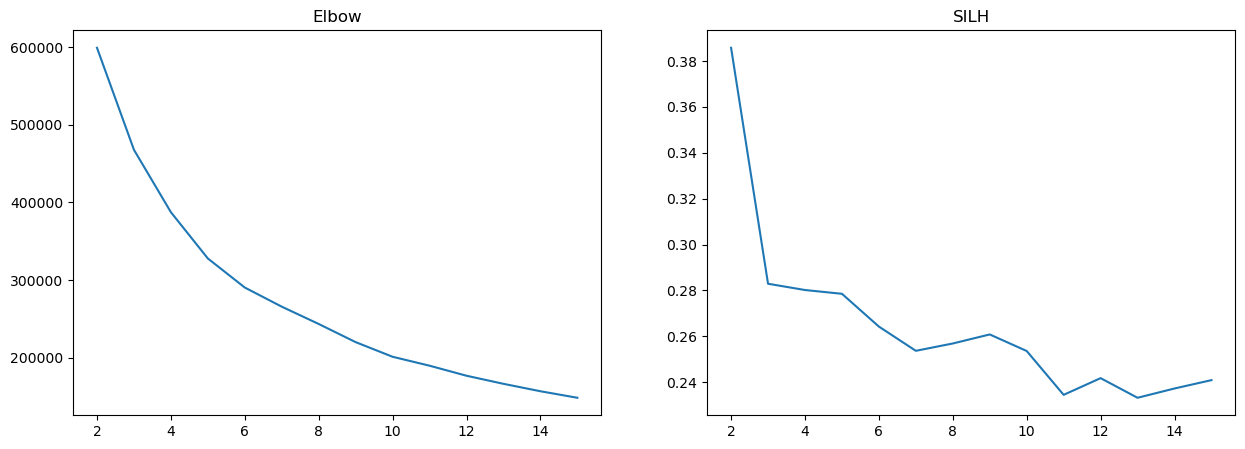

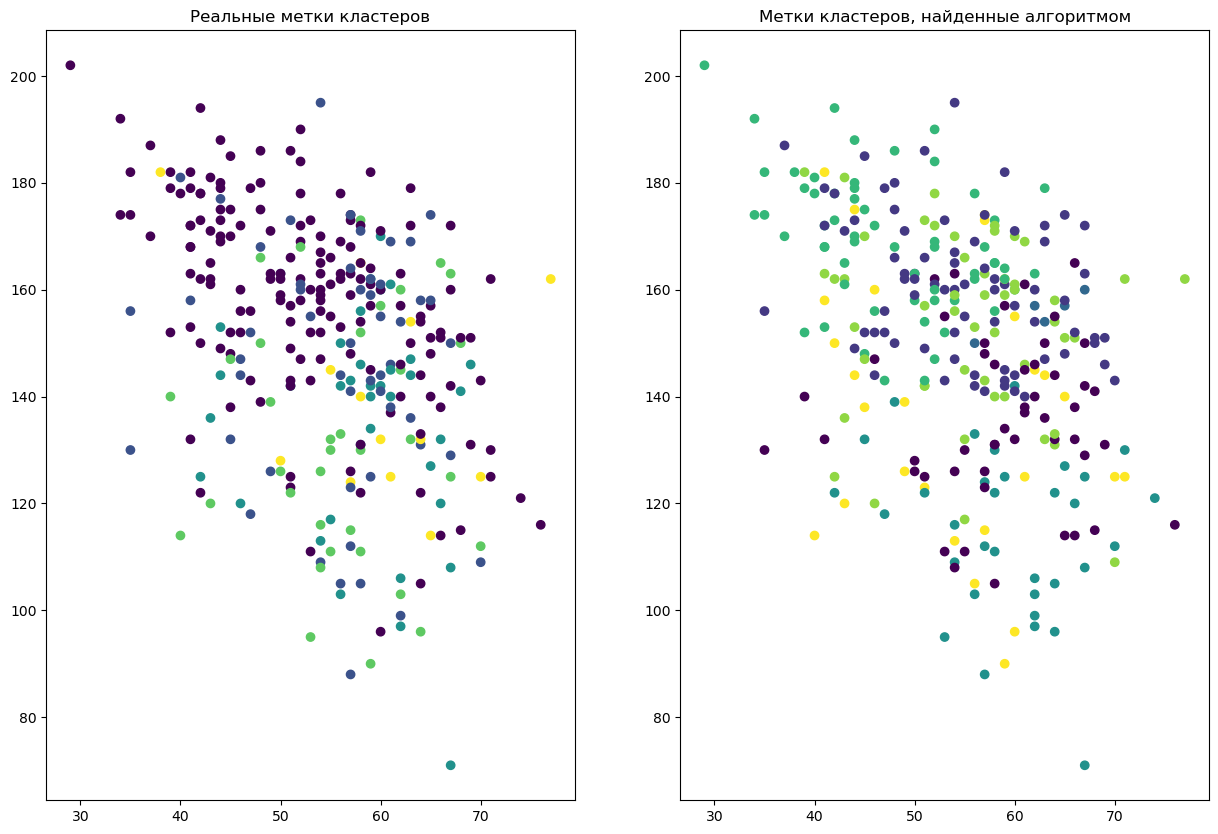

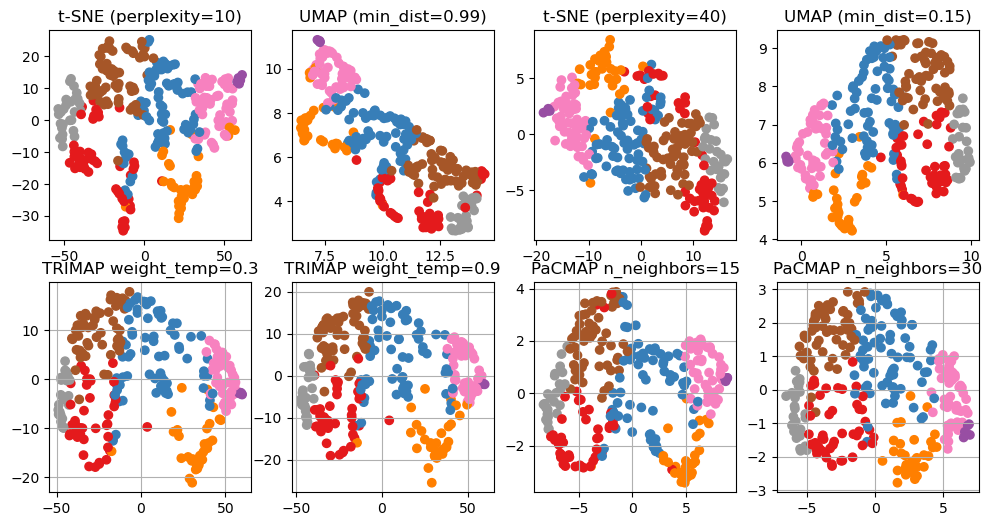

In [129]:
cluster_num = 5

cluster_labels_kmeans = plot_it(scaled_data, "k-means")

calc_metrics(data1_y.values.flatten(), cluster_labels_kmeans, cluster_num)

plot_scatter(scaled_data, data1_y.values.flatten(), cluster_labels_kmeans, cluster_num)

plot_reduce(scaled_data, cluster_labels_kmeans, cluster_num)

# Fuzzy

ARI 0.31736947772393737
homogeneity 0.2798369530070498
completeness 0.31298595228780474


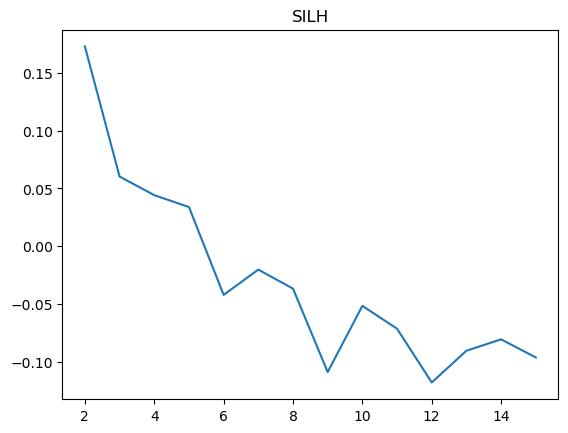

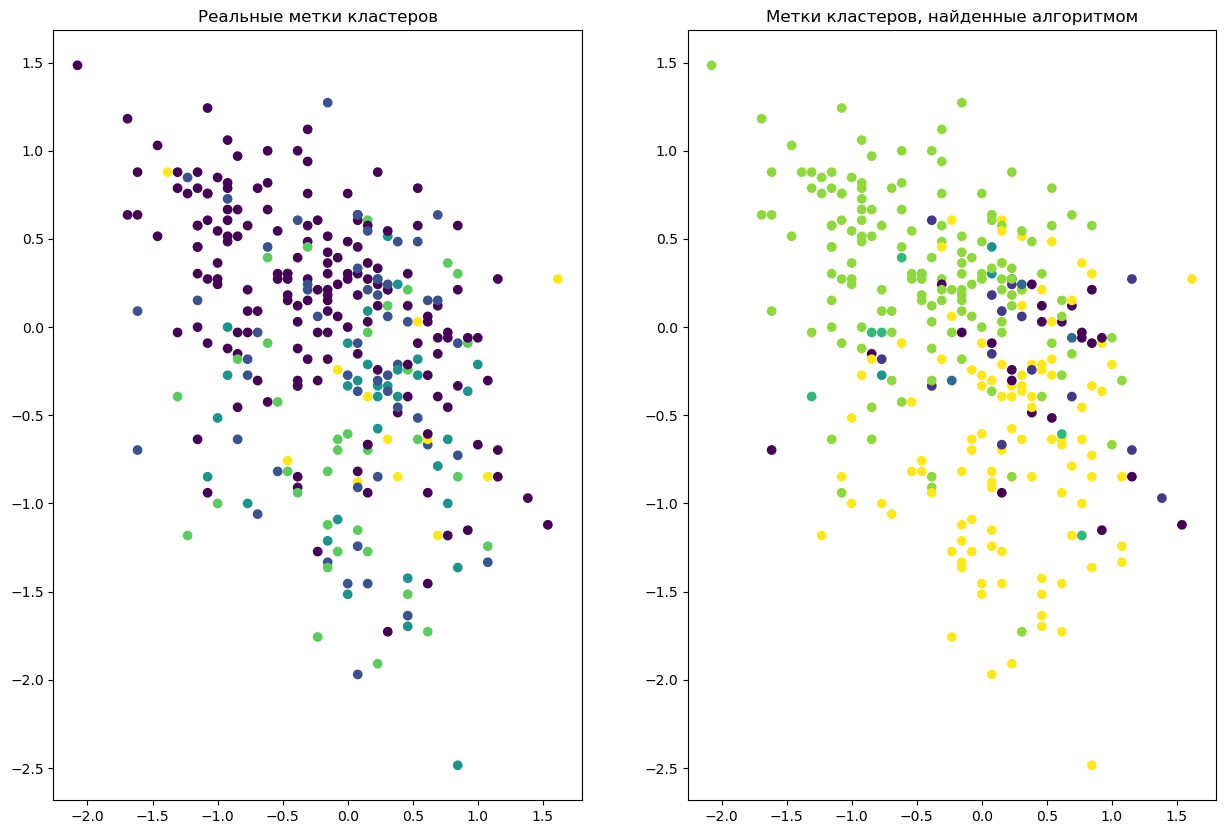

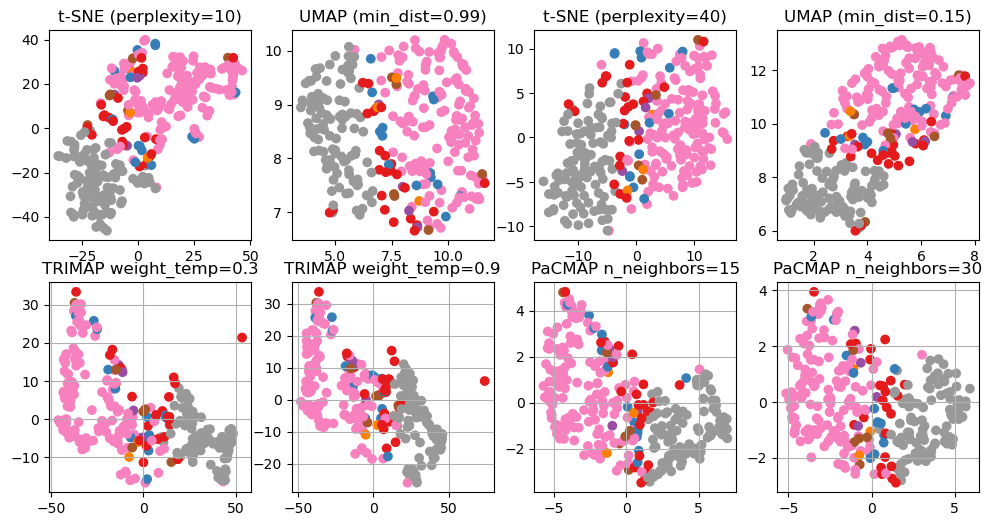

In [73]:
clusters_num = 5

cluster_labels_fuzzy = plot_it(scaled_data, "fuzzy")

calc_metrics(data1_y.values.flatten(), cluster_labels_fuzzy, clusters_num)

plot_scatter(scaled_data, data1_y.values.flatten(), cluster_labels_fuzzy, clusters_num)

plot_reduce(scaled_data, cluster_labels_fuzzy, clusters_num)

# DBSCAN

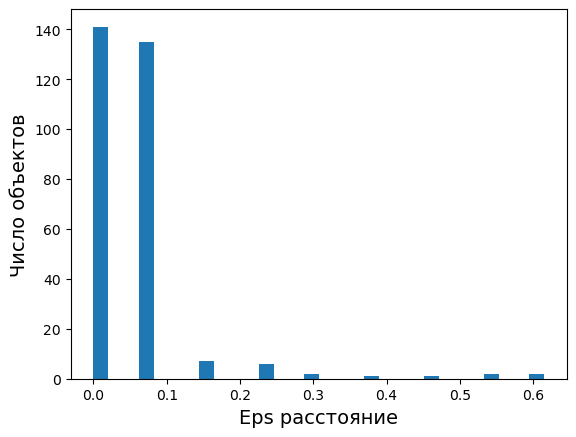

In [89]:
def calculate_kn_distance(data, k):
    kn_distance = []
    for i in range(len(data)):
        eucl_dist = []
        for j in range(len(data)):
            eucl_dist.append(
                np.sqrt(
                    ((data[i, 0] - data[j, 0]) ** 2) +
                    ((data[i, 1] - data[j, 1]) ** 2)
                )
            )
        eucl_dist.sort()
        kn_distance.append(eucl_dist[k])
    return kn_distance

# Расчет k-го ближайшего расстояния
eps_dist = calculate_kn_distance(scaled_data, 5)

# Построение гистограммы
plt.hist(eps_dist, bins=30)
plt.ylabel('Число объектов', size=14)
plt.xlabel('Eps расстояние', size=14)
plt.show()


In [83]:
max(eps_dist)

0.6153846153846156

ARI 0.0
homogeneity 0.0
completeness 1.0


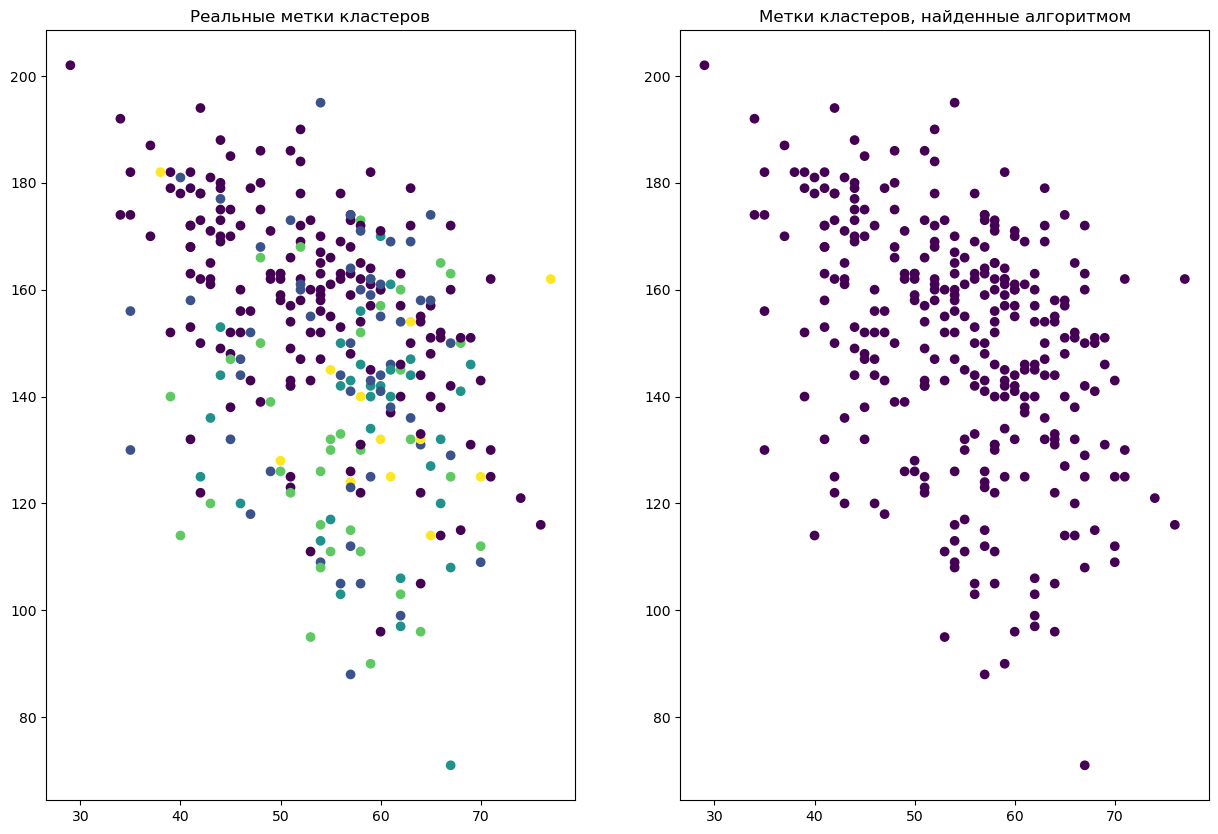

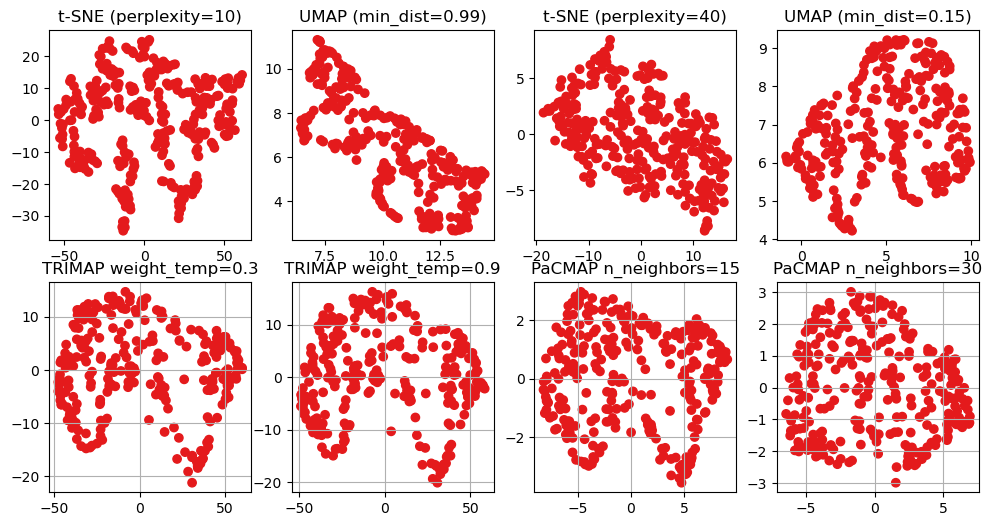

In [132]:
cluster_labels_dbscan = plot_it(scaled_data, "DBSCAN", eps=0.5)

calc_metrics(data1_y.values.flatten(), cluster_labels_dbscan)

plot_scatter(scaled_data, data1_y.values.flatten(), cluster_labels_dbscan)

plot_reduce(scaled_data, cluster_labels_dbscan)

In [152]:
# fetch dataset 

data2 = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
data2_X = data2.data.features 
data2_y = data2.data.targets

In [153]:
data2_X = data2_X.fillna(-10)

In [154]:
rscaler = RobustScaler().fit(data2_X)
scaled_data2 = rscaler.transform(data2_X)

distance_mat = {}

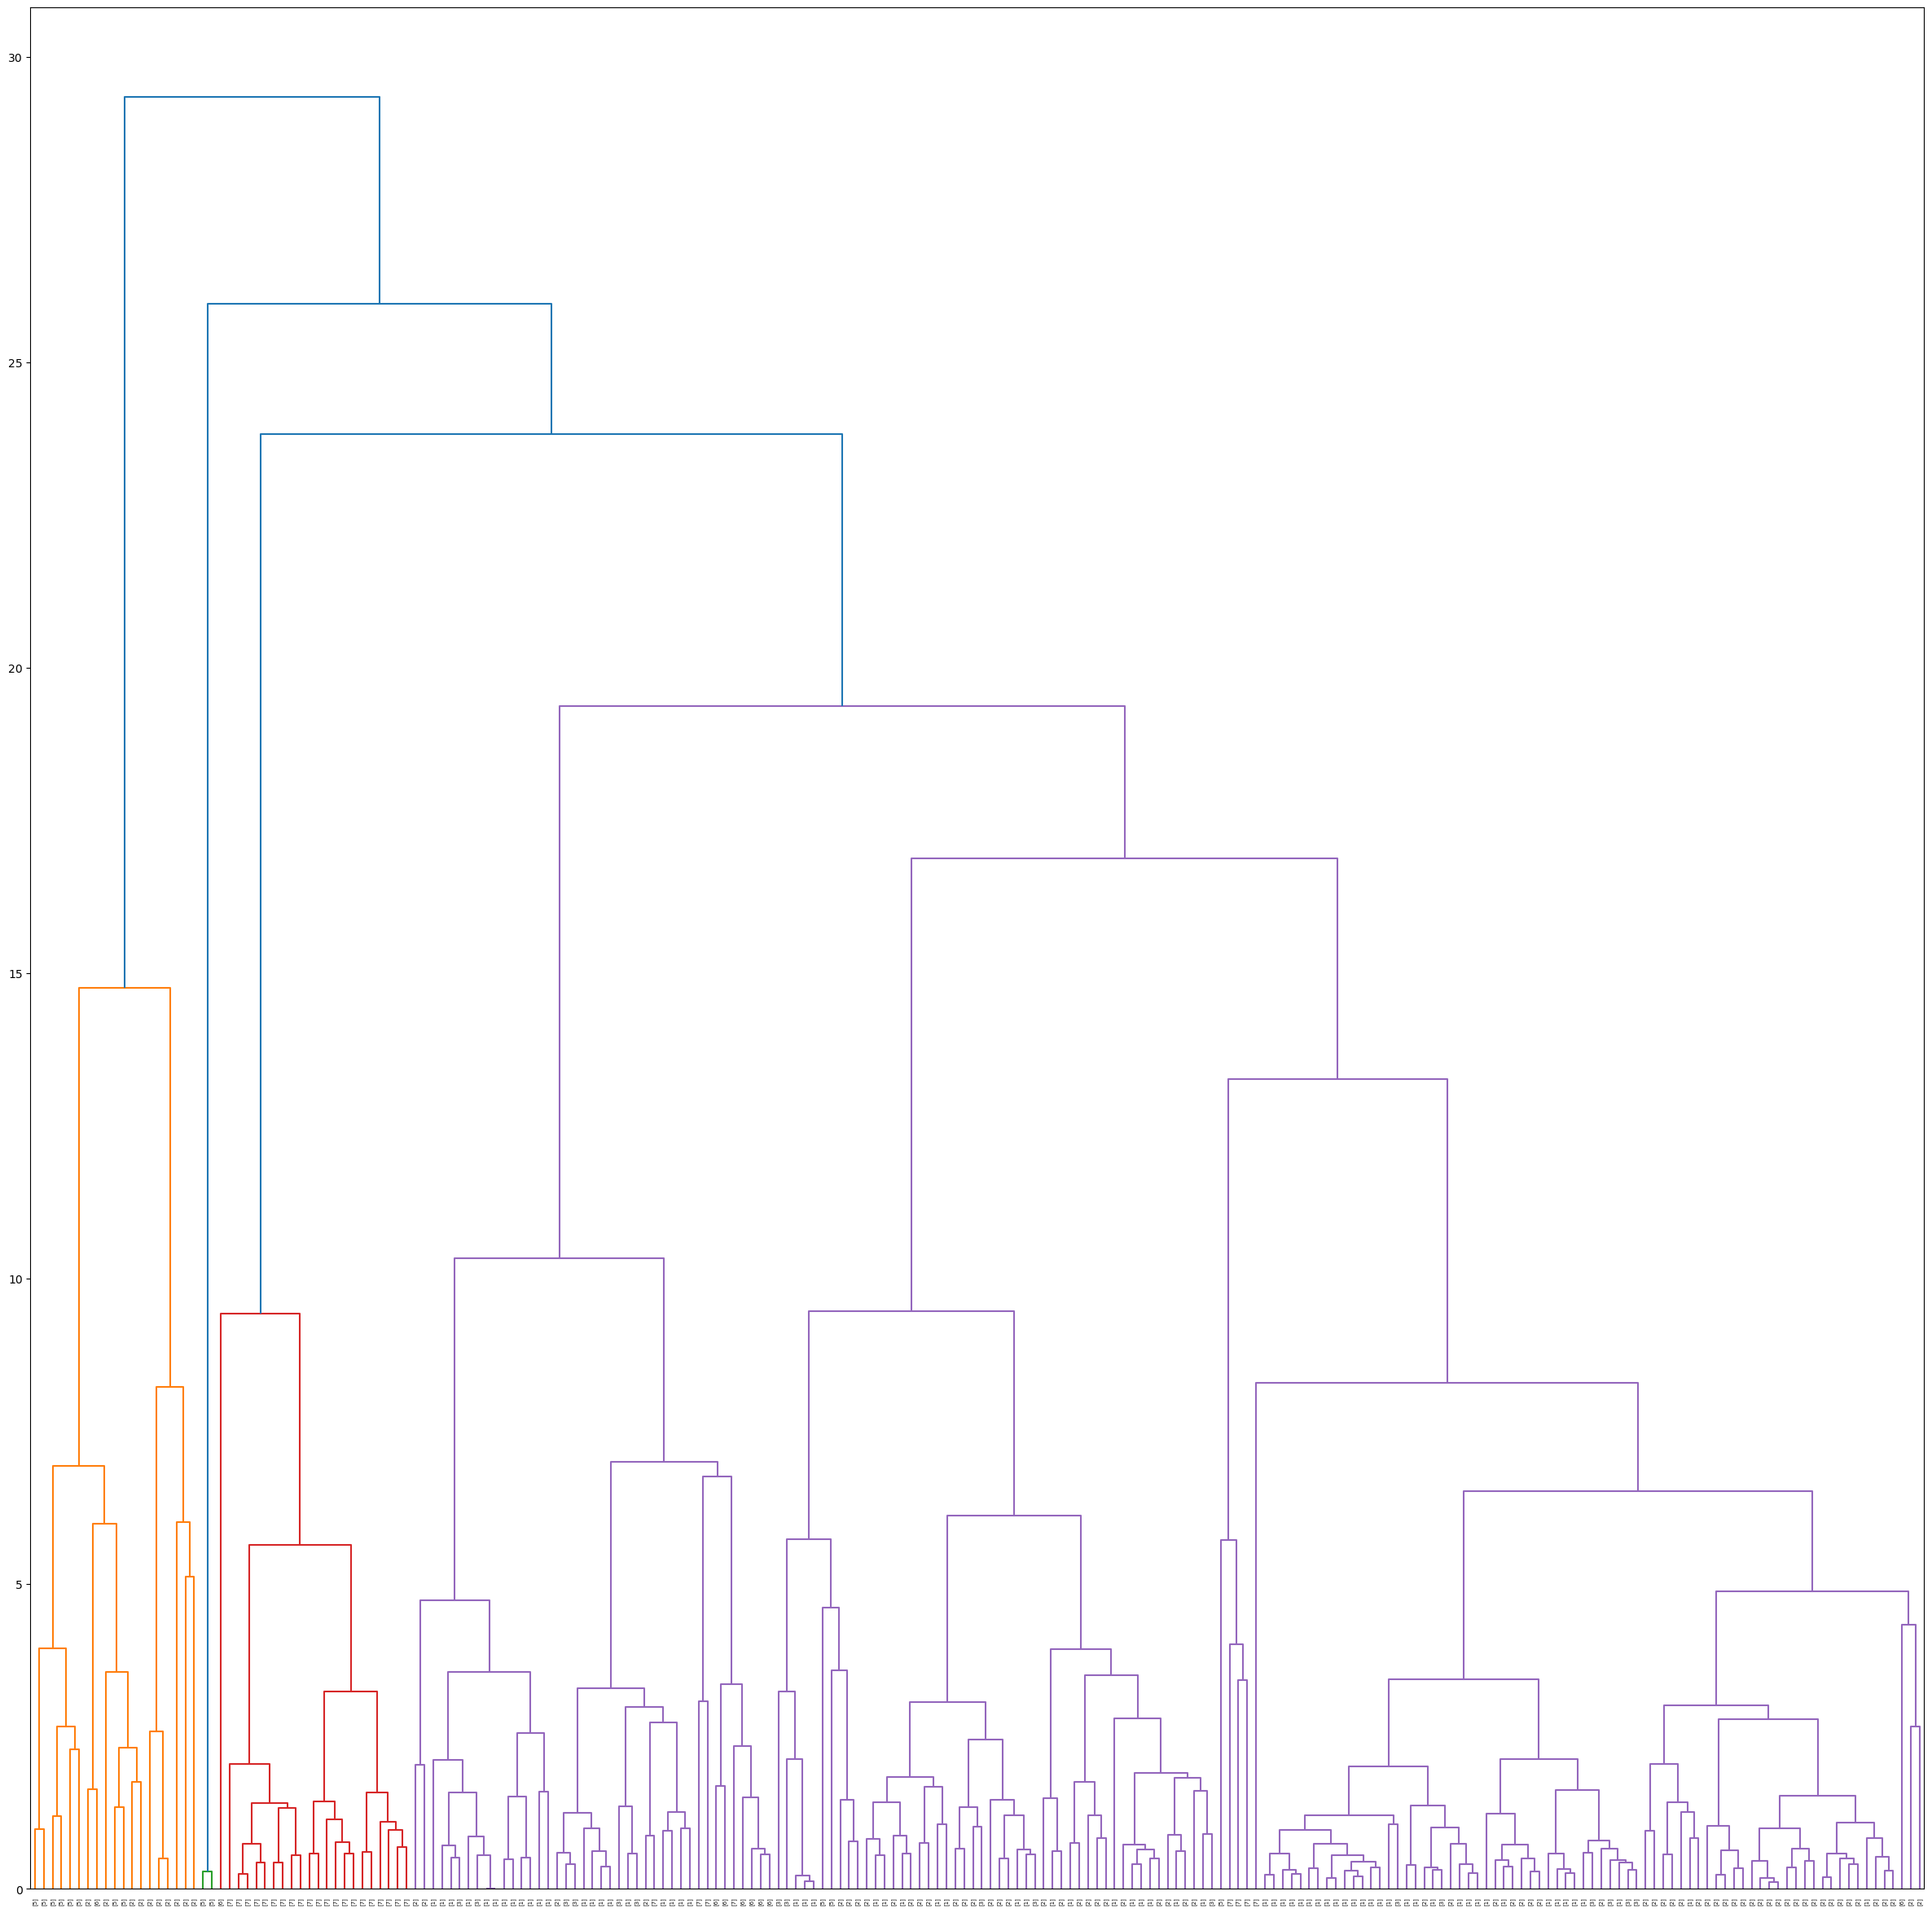

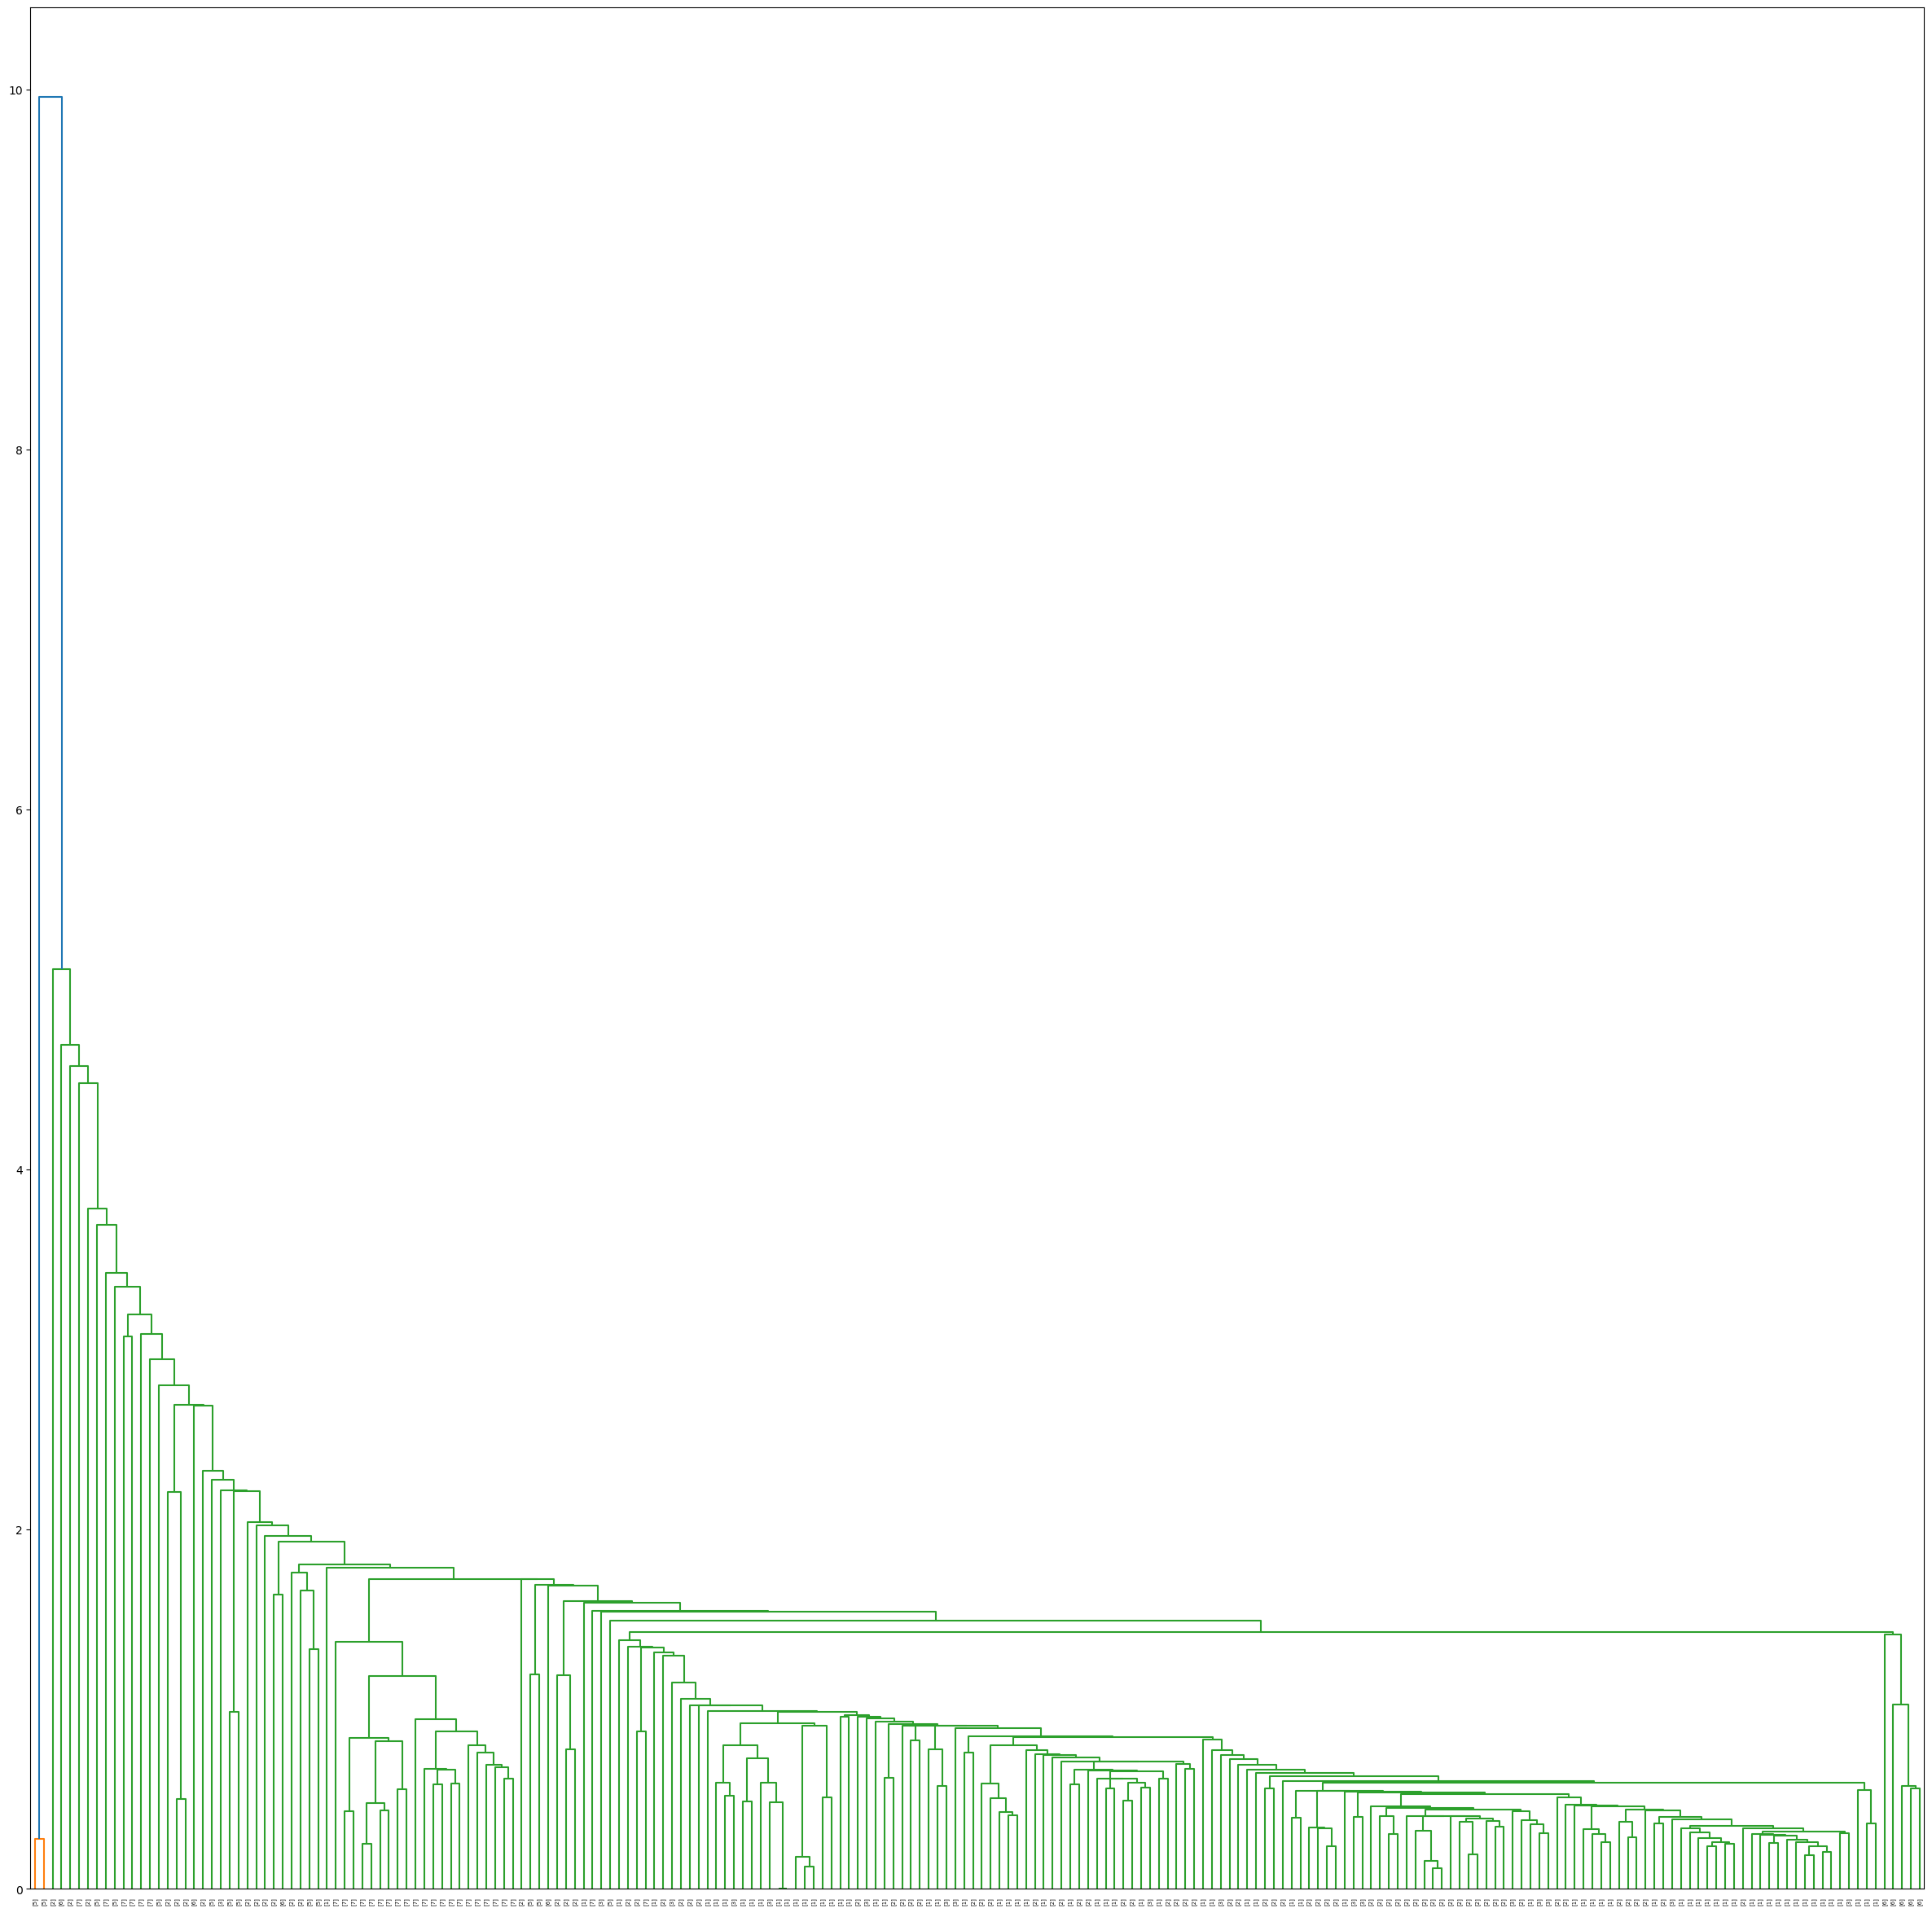

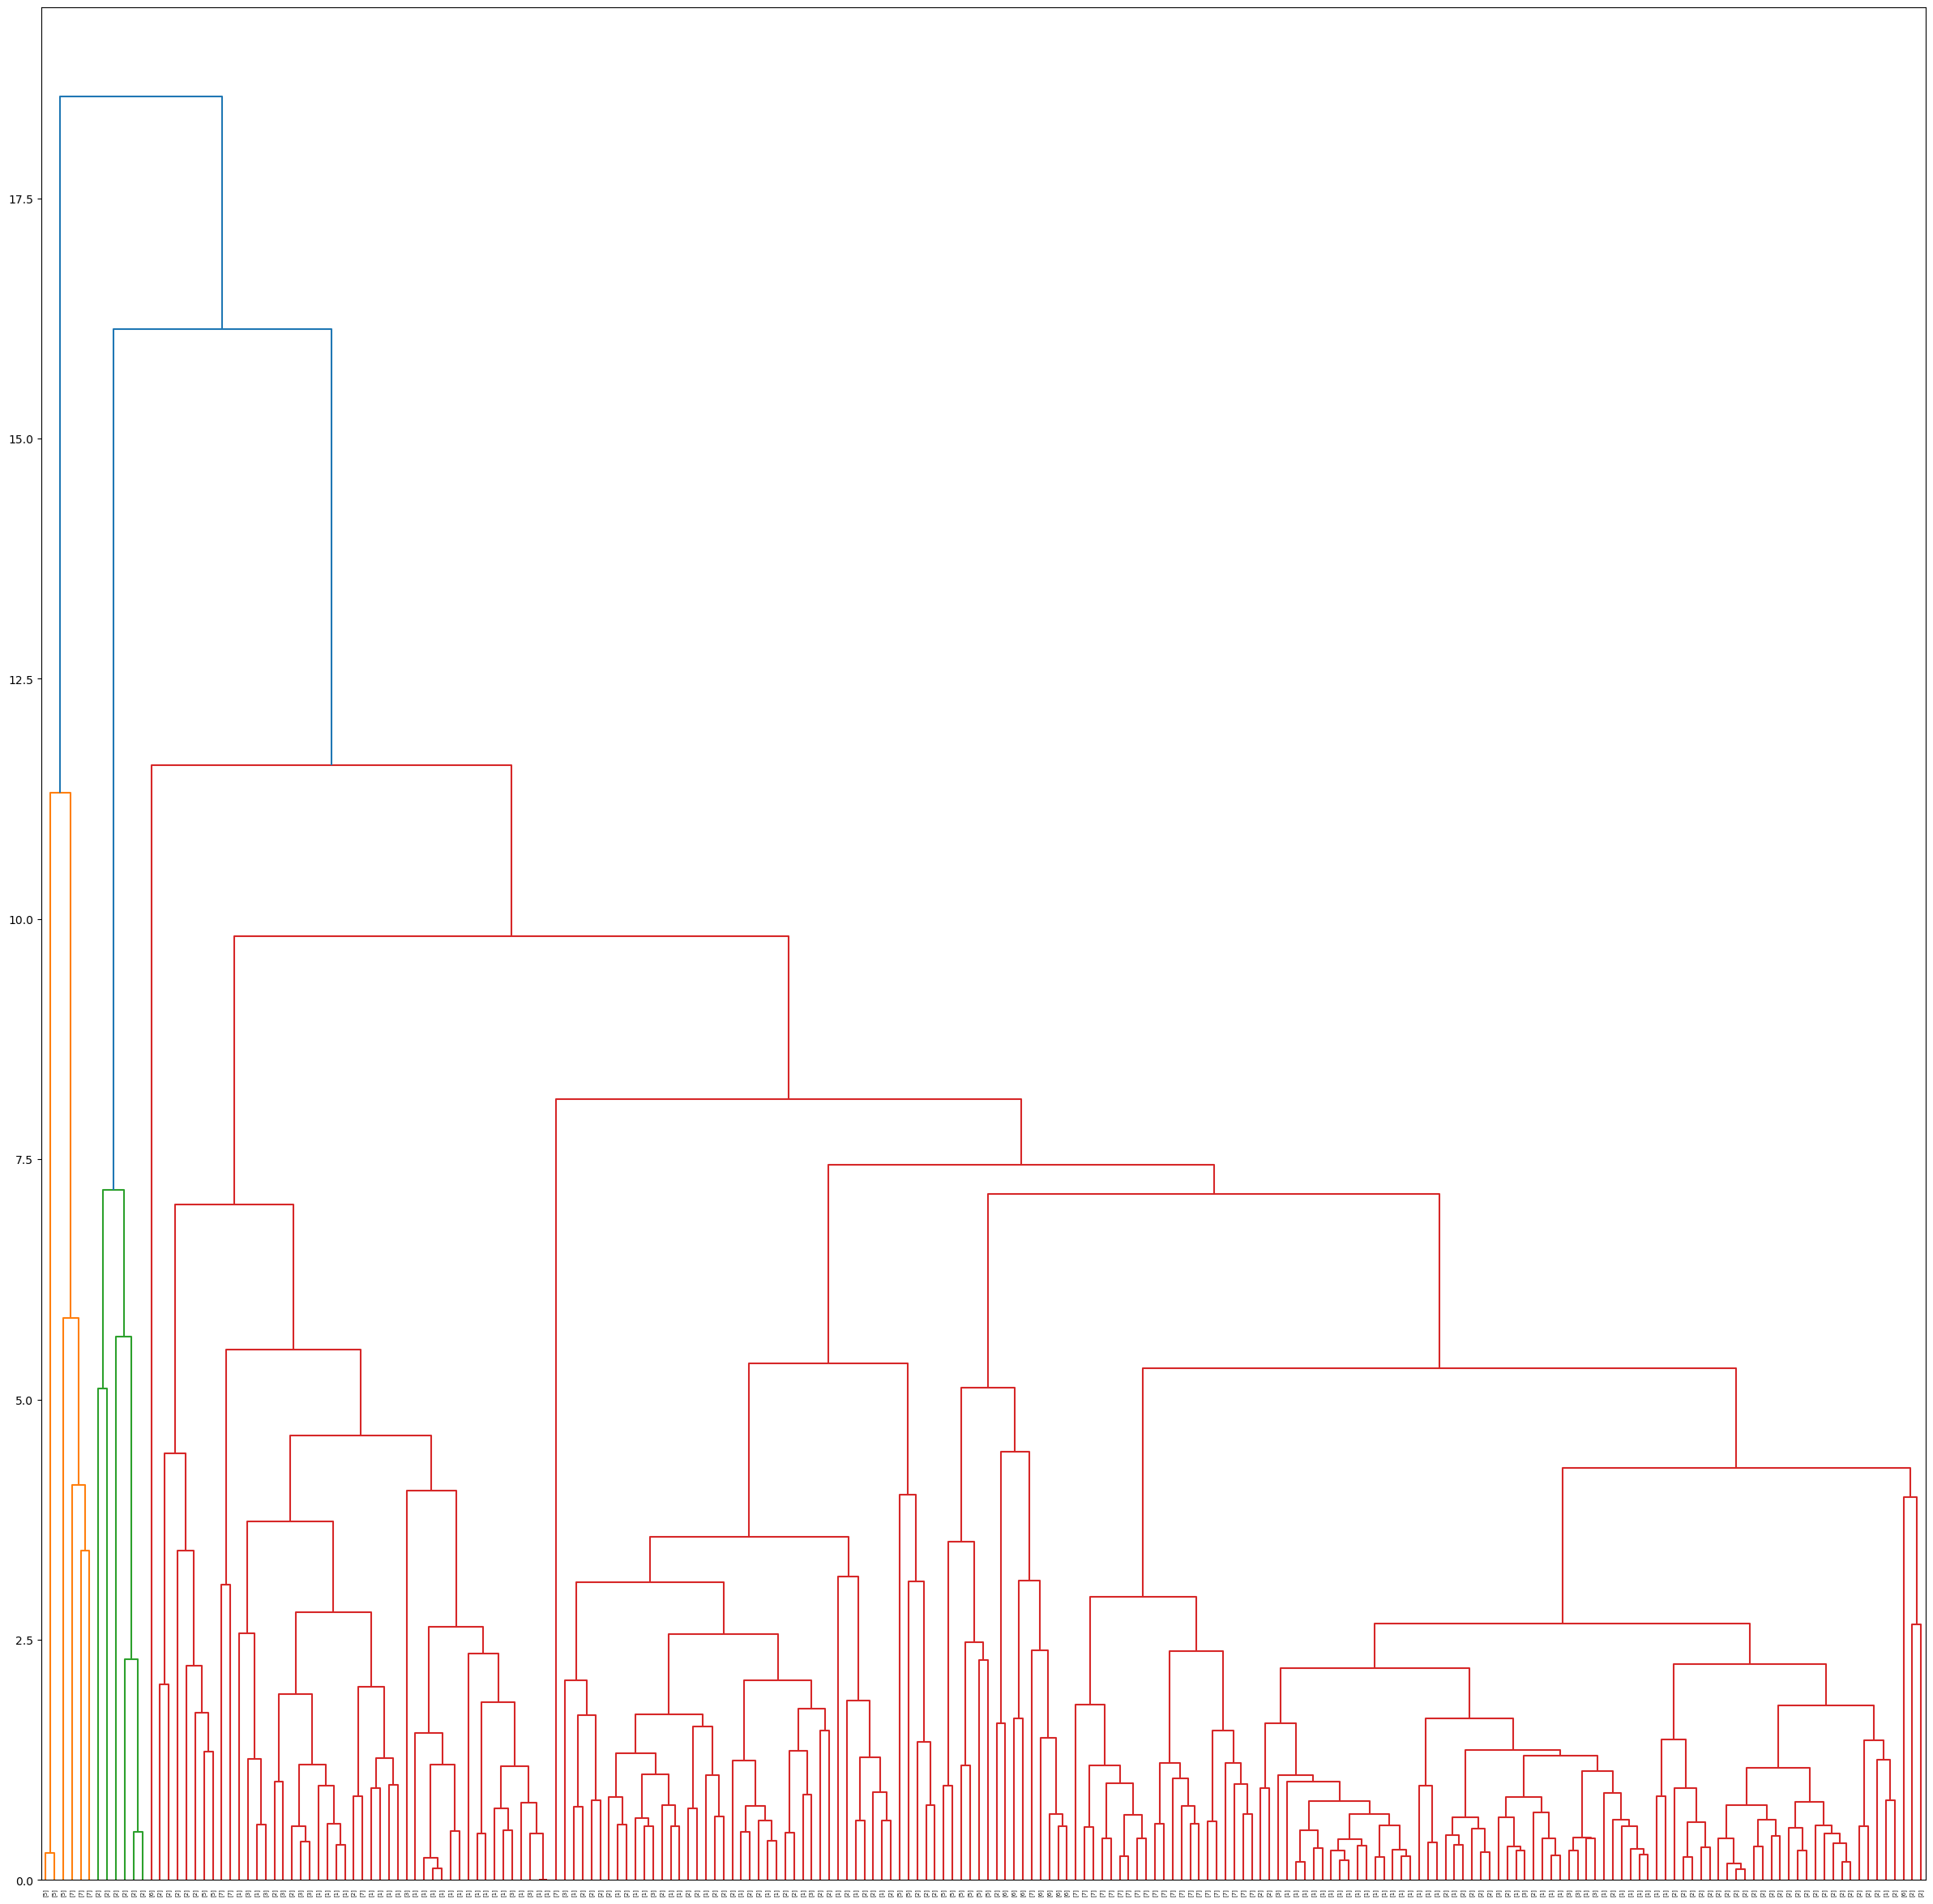

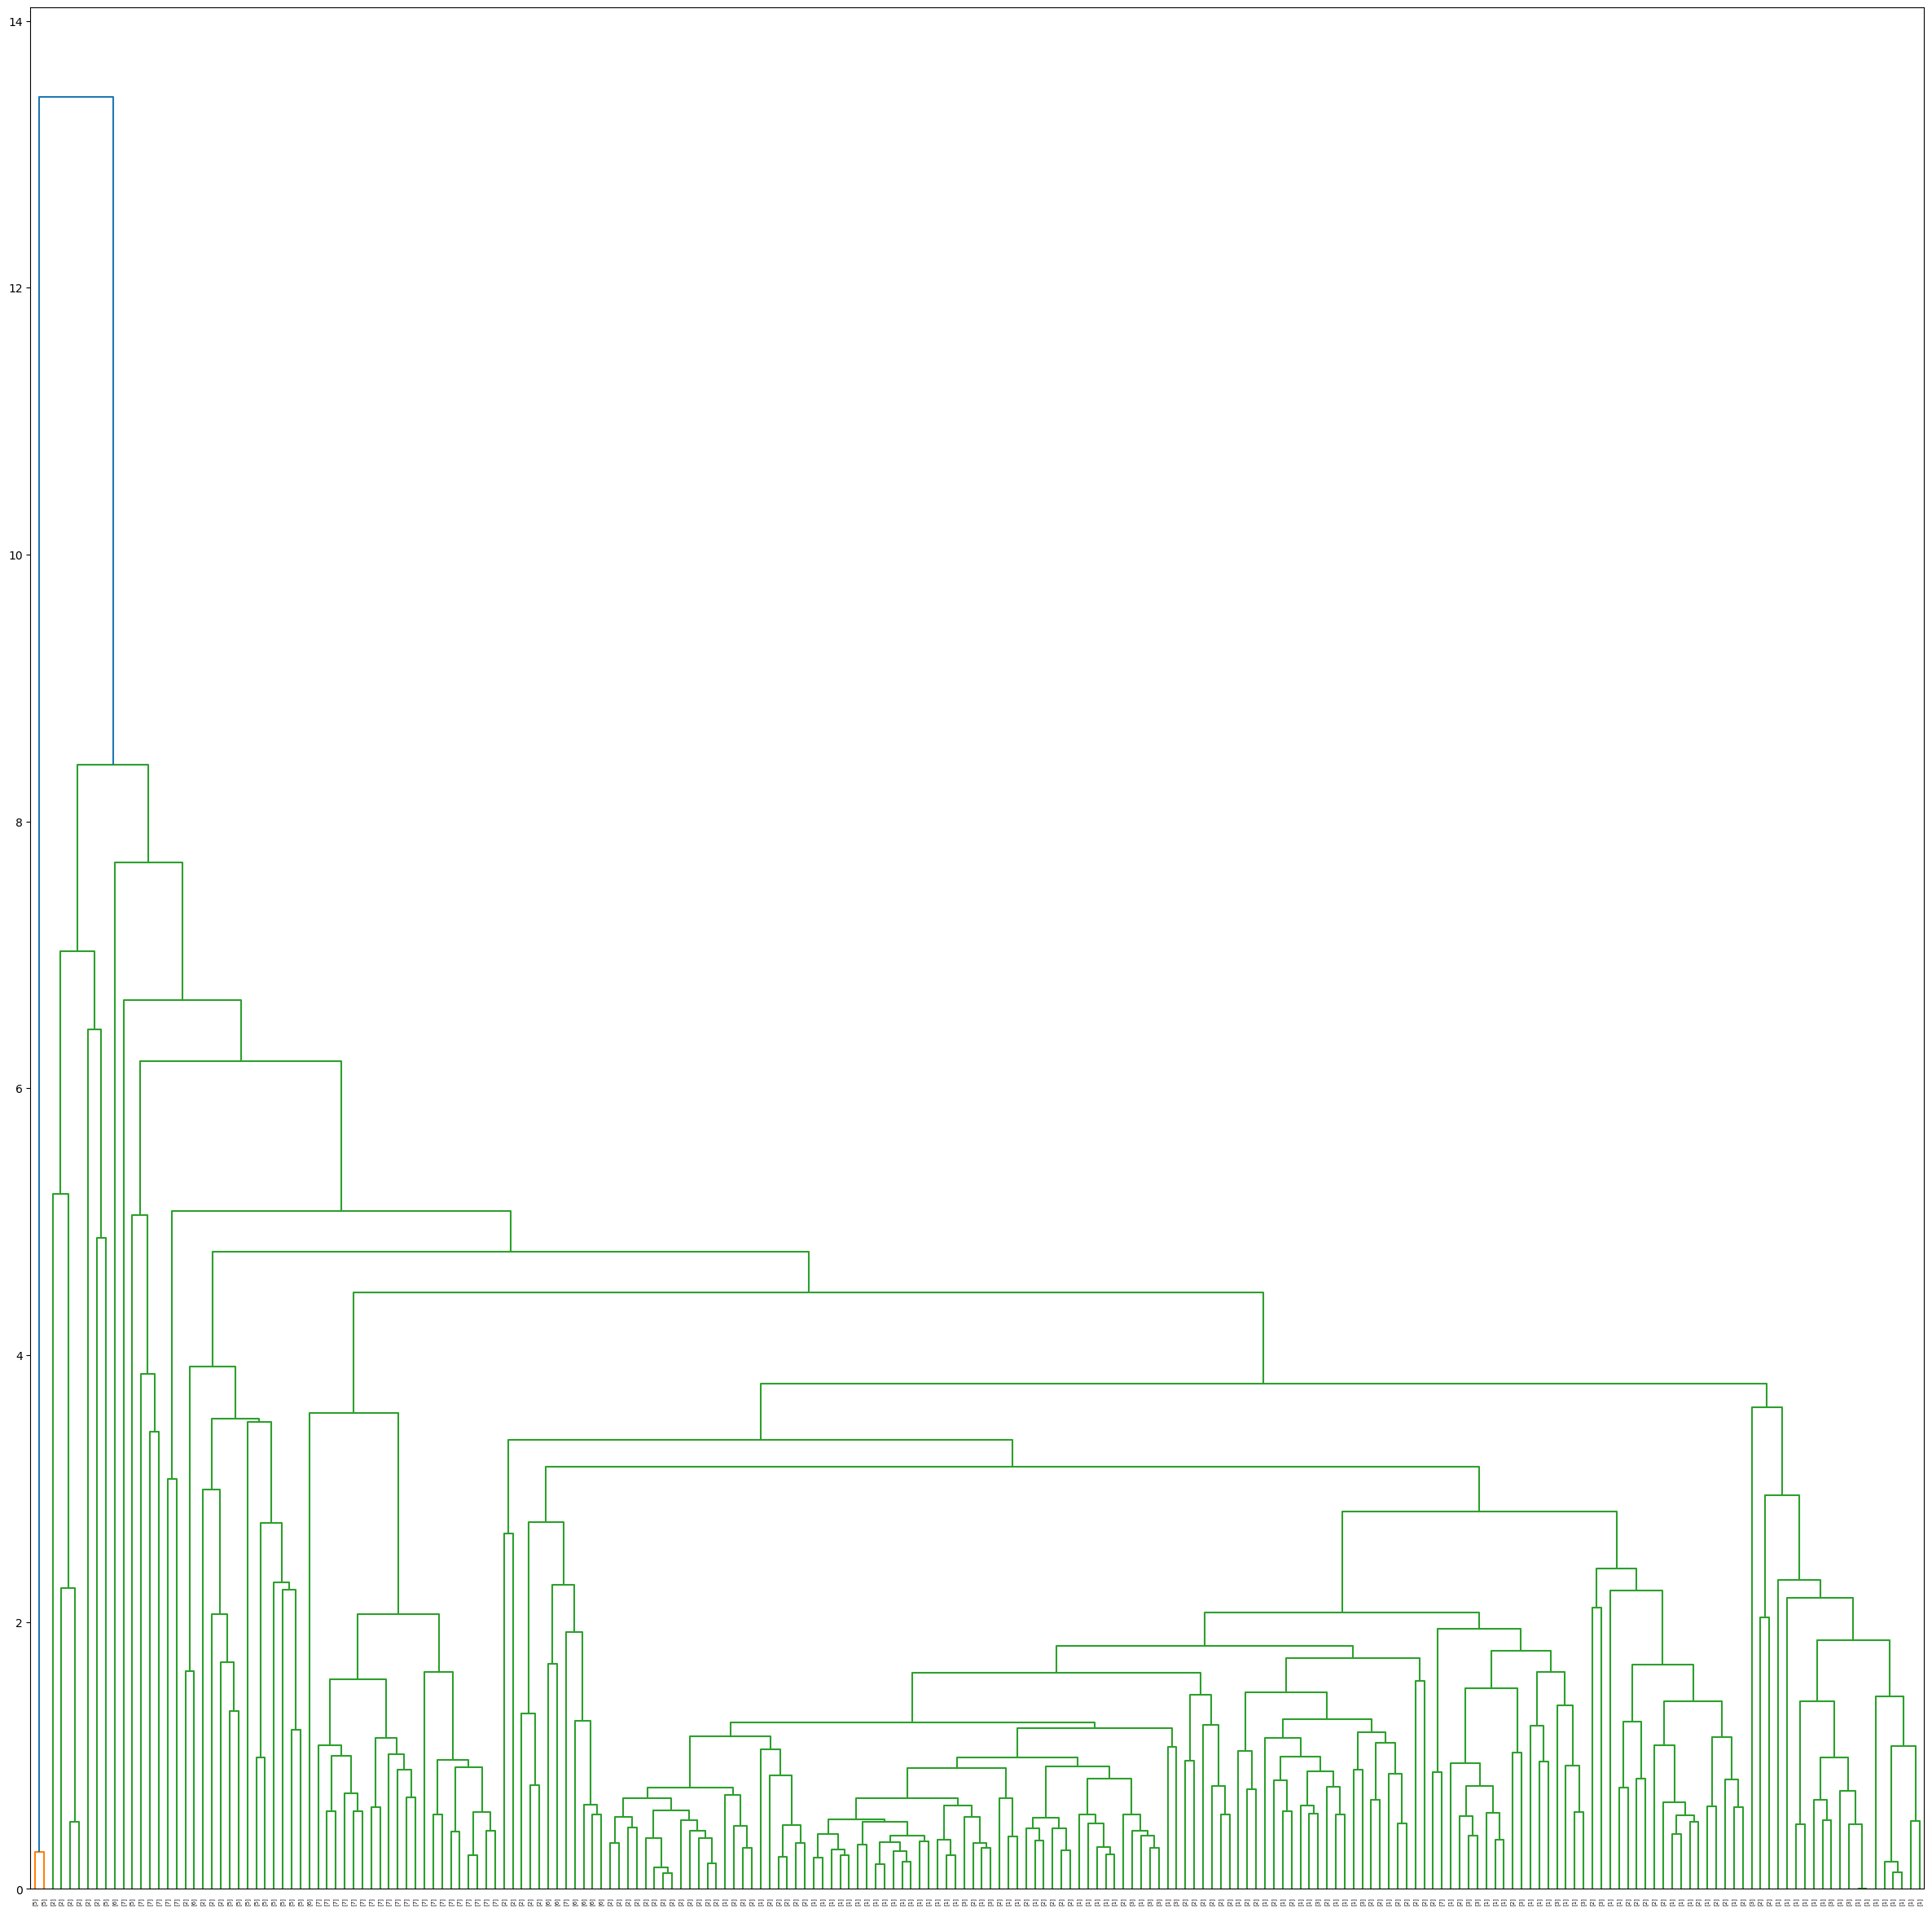

0.0855702450192704
0.7982367718970629
0.30688046103200095


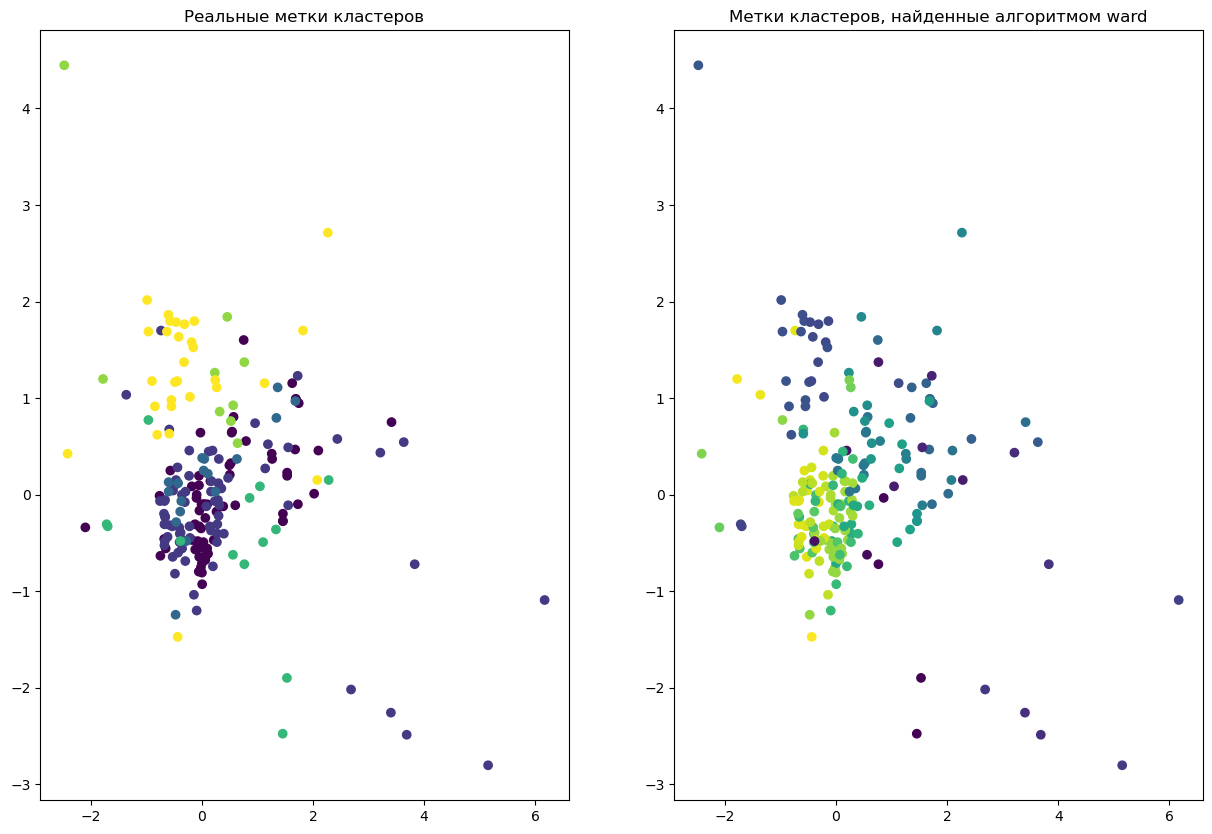

In [157]:
distance_mat["ward"] = linkage(scaled_data2,
                       method="ward",
                       metric="euclidean")
fig = plt.figure(figsize=(30,30))

R = dendrogram(distance_mat["ward"],
              labels=data2_y.values)

plt.show()

distance_mat["single"] = linkage(scaled_data2,
                       method="single",
                       metric="euclidean")
fig = plt.figure(figsize=(30,30))

R = dendrogram(distance_mat["single"],
              labels=data2_y.values)

plt.show()


distance_mat["complete"] = linkage(scaled_data2,
                       method="complete",
                       metric="euclidean")
fig = plt.figure(figsize=(30,30))

R = dendrogram(distance_mat["complete"],
              labels=data2_y.values)

plt.show()


distance_mat["average"] = linkage(scaled_data2,
                       method="average",
                       metric="euclidean")
fig = plt.figure(figsize=(30,30))

R = dendrogram(distance_mat["average"],
              labels=data2_y.values)

plt.show()


alg = "ward"

df = data2_X[:]

df["cluster"] = fcluster(distance_mat[alg],
                              np.max(np.unique(df)),
                             criterion="maxclust")

df["target"] = data2_y.values

fig, axes = plt.subplots(1,2, figsize=(15,10))

axes[0].scatter(scaled_data2[:, 0], scaled_data2[:, 1],
               c=df["target"])

axes[1].scatter(scaled_data2[:, 0], scaled_data2[:, 1],
               c=df["cluster"])

axes[0].set_title("Реальные метки кластеров")
axes[1].set_title(f"Метки кластеров, найденные алгоритмом {alg}")

print(adjusted_rand_score(df["target"], df["cluster"]))
print(homogeneity_score(df["target"], df["cluster"]))
print(completeness_score(df["target"], df["cluster"]))

ARI 0.19186379127805284
homogeneity 0.33151392439579414
completeness 0.2659923063093872


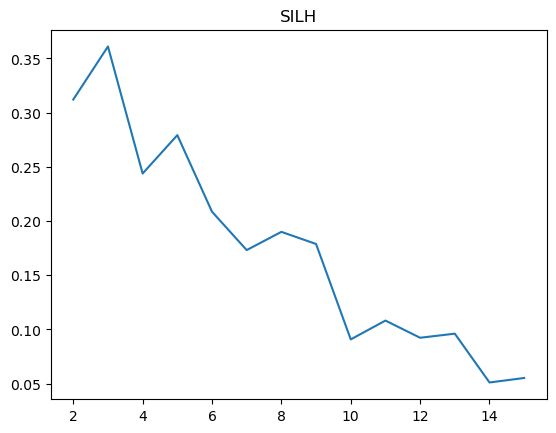

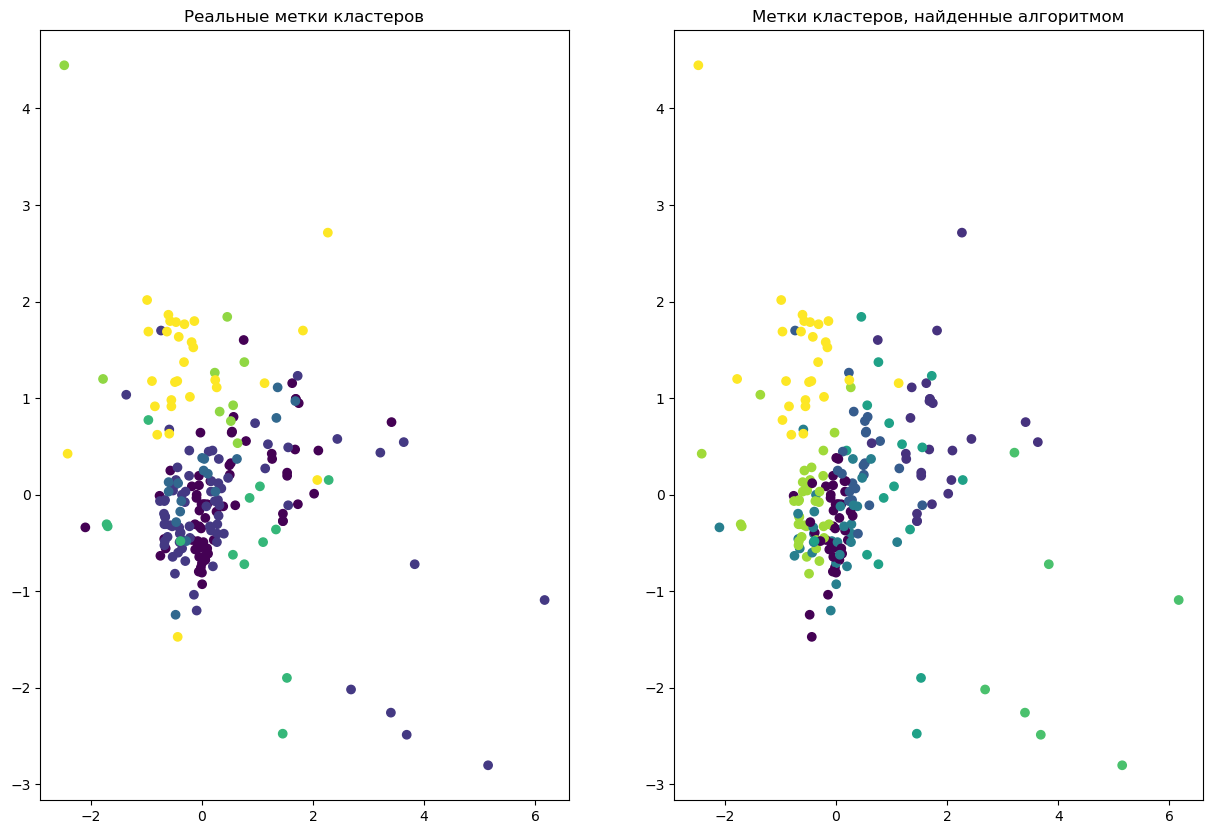

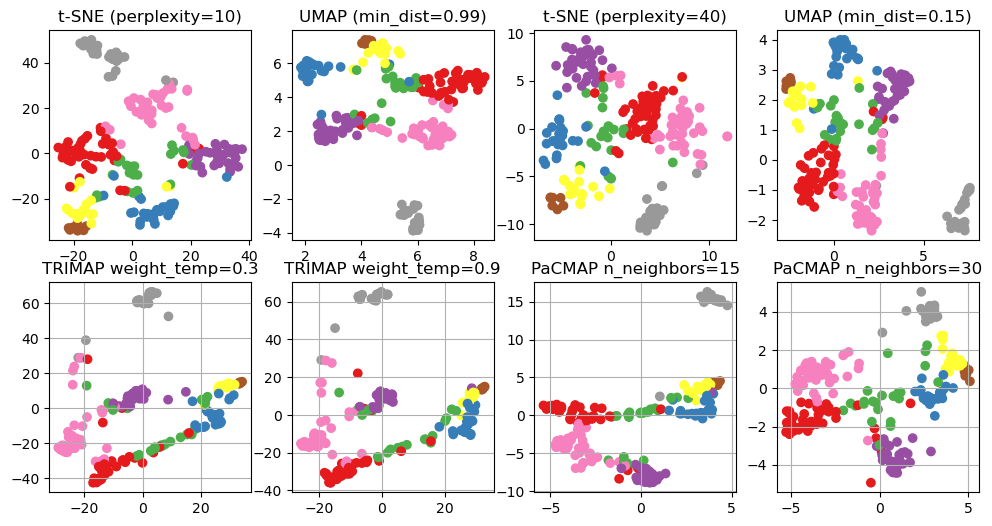

In [158]:
cluster_num = 6

cluster_labels_fuzzy = plot_it(scaled_data2, "fuzzy")

calc_metrics(data2_y.values.flatten(), cluster_labels_fuzzy, cluster_num)

plot_scatter(scaled_data2, data2_y.values.flatten(), cluster_labels_fuzzy, cluster_num)

plot_reduce(scaled_data2, cluster_labels_fuzzy, cluster_num)

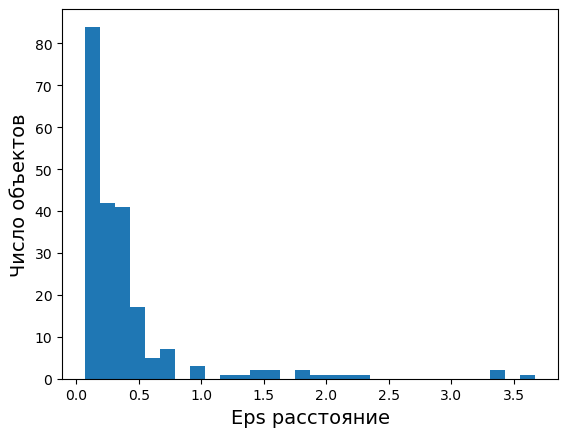

In [162]:
# Расчет k-го ближайшего расстояния
eps_dist = calculate_kn_distance(scaled_data2, 6)

# Построение гистограммы
plt.hist(eps_dist, bins=30)
plt.ylabel('Число объектов', size=14)
plt.xlabel('Eps расстояние', size=14)
plt.show()

In [165]:
def plot_it(data, plot_type, eps=None):
    if plot_type == "k-means":
        elb, silh, cluster_labels = find_optimal_kmeans_clusters(data)
        fig, ax = plt.subplots(1, 2, figsize=(15,10))
        ax[0].plot(range(2,11), elb)
        ax[0].set_title("Elbow")
        ax[1].plot(range(2,11), silh)
        ax[1].set_title("SILH")
    elif plot_type == "fuzzy":
#         fig, ax = plt.subplots(1, 1, figsize=(15,10))
        silh, cluster_labels = find_optimal_fuzzy_clusters(data)
        plt.plot(range(2,11), silh)
        plt.title("SILH")
    elif plot_type == "DBSCAN":
        cluster_labels = DBDCAN_clusters(data, eps)
    else: 
        raise Exception("ты дурак")
    
    
    return cluster_labels

ARI -0.020762617947270932
homogeneity 0.1674694311058978
completeness 0.22685759449039478


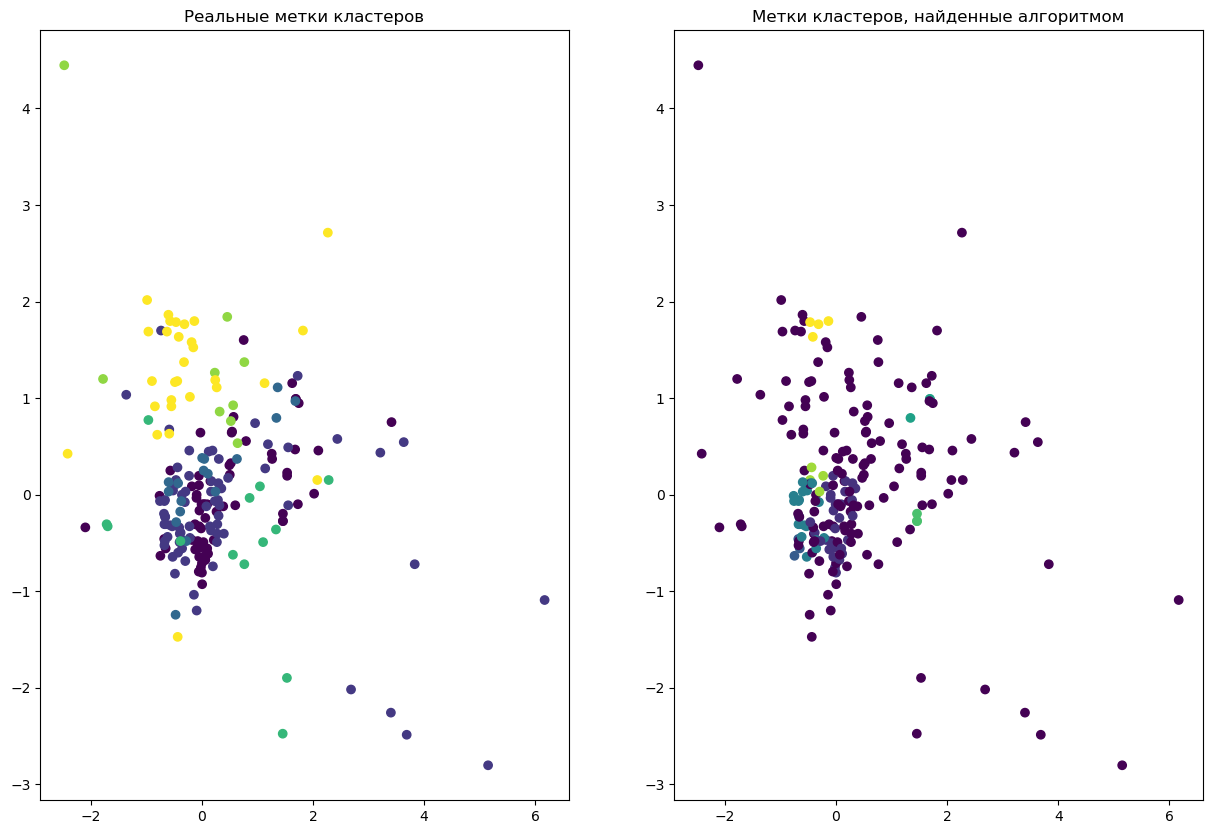

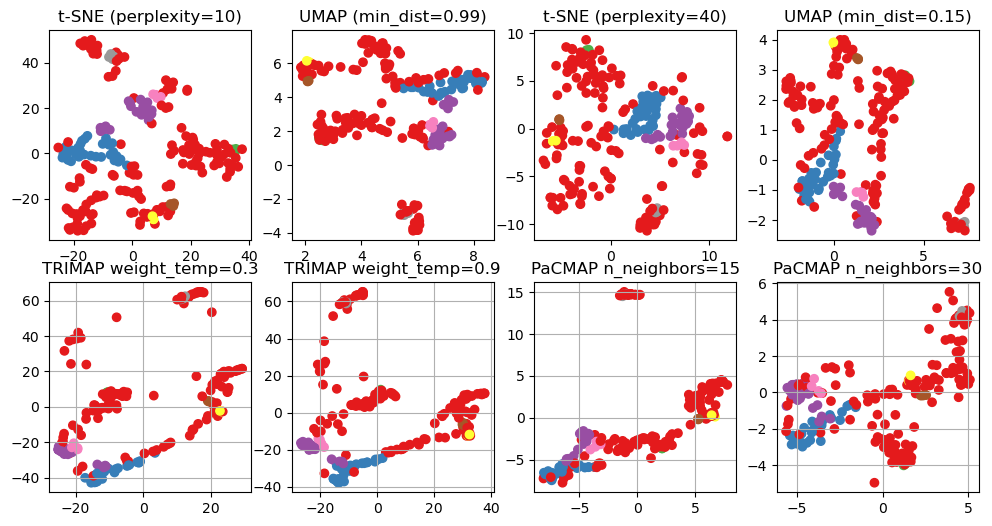

In [166]:
cluster_labels_dbscan = plot_it(scaled_data2, "DBSCAN", eps=0.5)

calc_metrics(data2_y.values.flatten(), cluster_labels_dbscan)

plot_scatter(scaled_data2, data2_y.values.flatten(), cluster_labels_dbscan)

plot_reduce(scaled_data2, cluster_labels_dbscan)

In [140]:
mammoth = pd.read_csv("../prac3_4/mammoth.csv")[:1000]
mammoth

rscaler = RobustScaler().fit(mammoth)
scaled_data_m = rscaler.transform(mammoth)
scaled_data_m

array([[-0.61365018, -0.06816807, -0.04386607],
       [-0.60213779, -0.05494521, -0.19112405],
       [-0.61638976, -0.0386839 , -0.12655469],
       ...,
       [-0.03867731, -0.91510642, -1.11645211],
       [-0.07847815, -0.88157099, -0.90755125],
       [-0.09143728, -0.89023618, -0.58545166]])

In [145]:
def plot_scatter(data, cluster_true, cluster_pred, cluster_num=None):
    fig, axes = plt.subplots(1,2, figsize=(15,10))
    
    
    if cluster_true is None:
        axes[0].scatter(data[:, 0], data[:, 1])
        axes[0].set_title("НЕТ Реальных меткок кластеров")
    else:
        axes[0].scatter(data[:, 0], data[:, 1],
                           c=cluster_true)
        axes[0].set_title("Реальные метки кластеров")
    
    if cluster_num is None:
        axes[1].scatter(data[:, 0], data[:, 1],
                       c=cluster_pred)
    else:
        axes[1].scatter(data[:, 0], data[:, 1],
                       c=cluster_pred[cluster_num])
        
    axes[1].set_title(f"Метки кластеров, найденные алгоритмом")
    
    
def plot_reduce(data, y_pred, cluster_index=None):
    
    X_test = data
    
    if cluster_index is not None:
        y_pred = y_pred[cluster_index]

    plt.figure(figsize=(12, 6))

    plt.subplot(2, 4, 1)
    tsne = TSNE(n_components=2, perplexity=10, random_state=42)
    X_tsne = tsne.fit_transform(X_test)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap=plt.cm.Set1)
    plt.title('t-SNE (perplexity=10)')

    plt.subplot(2, 4, 2)
    umap_model = umap.UMAP(n_components=2, min_dist=0.1, random_state=42)
    X_umap = umap_model.fit_transform(X_test)
    plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_pred, cmap=plt.cm.Set1)
    plt.title('UMAP (min_dist=0.99)')

    plt.subplot(2, 4, 3)
    tsne = TSNE(n_components=2, perplexity=40, random_state=42)
    X_tsne = tsne.fit_transform(X_test)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap=plt.cm.Set1)
    plt.title('t-SNE (perplexity=40)')

    plt.subplot(2, 4, 4)
    umap_model = umap.UMAP(n_components=2, min_dist=0.15, random_state=42)
    X_umap = umap_model.fit_transform(X_test)
    plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_pred, cmap=plt.cm.Set1)
    plt.title('UMAP (min_dist=0.15)')

    plt.subplot(2, 4, 5)
    X_embedded = trimap.TRIMAP(n_dims=2, weight_temp=0.3).fit_transform(X_test)
    plt.grid()
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_pred, cmap=plt.cm.Set1)
    plt.title('TRIMAP weight_temp=0.3')

    plt.subplot(2, 4, 6)
    X_embedded = trimap.TRIMAP(n_dims=2, weight_temp=0.9).fit_transform(X_test)
    plt.grid()
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_pred, cmap=plt.cm.Set1)
    plt.title('TRIMAP weight_temp=0.9')

    plt.subplot(2, 4, 7)
    embedding = pacmap.PaCMAP(n_components=2, n_neighbors=15)
    X_transformed = embedding.fit_transform(X_test, init="pca")
    plt.grid()
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_pred, cmap=plt.cm.Set1)
    plt.title('PaCMAP n_neighbors=15')

    plt.subplot(2, 4, 8)
    embedding = pacmap.PaCMAP(n_components=2, n_neighbors=30)
    X_transformed = embedding.fit_transform(X_test, init="pca")
    plt.grid()
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_pred, cmap=plt.cm.Set1)
    plt.title('PaCMAP n_neighbors=30')


    plt.show()

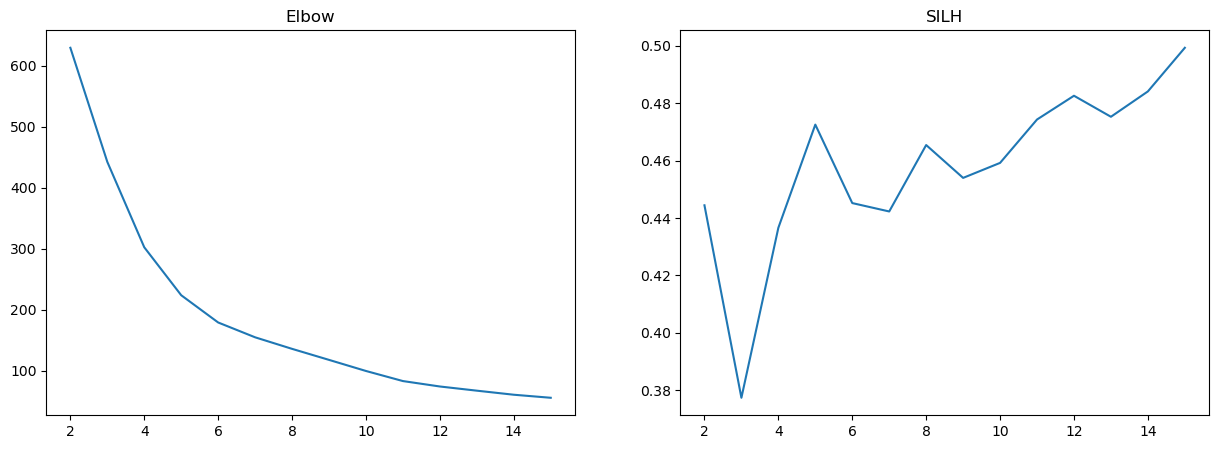

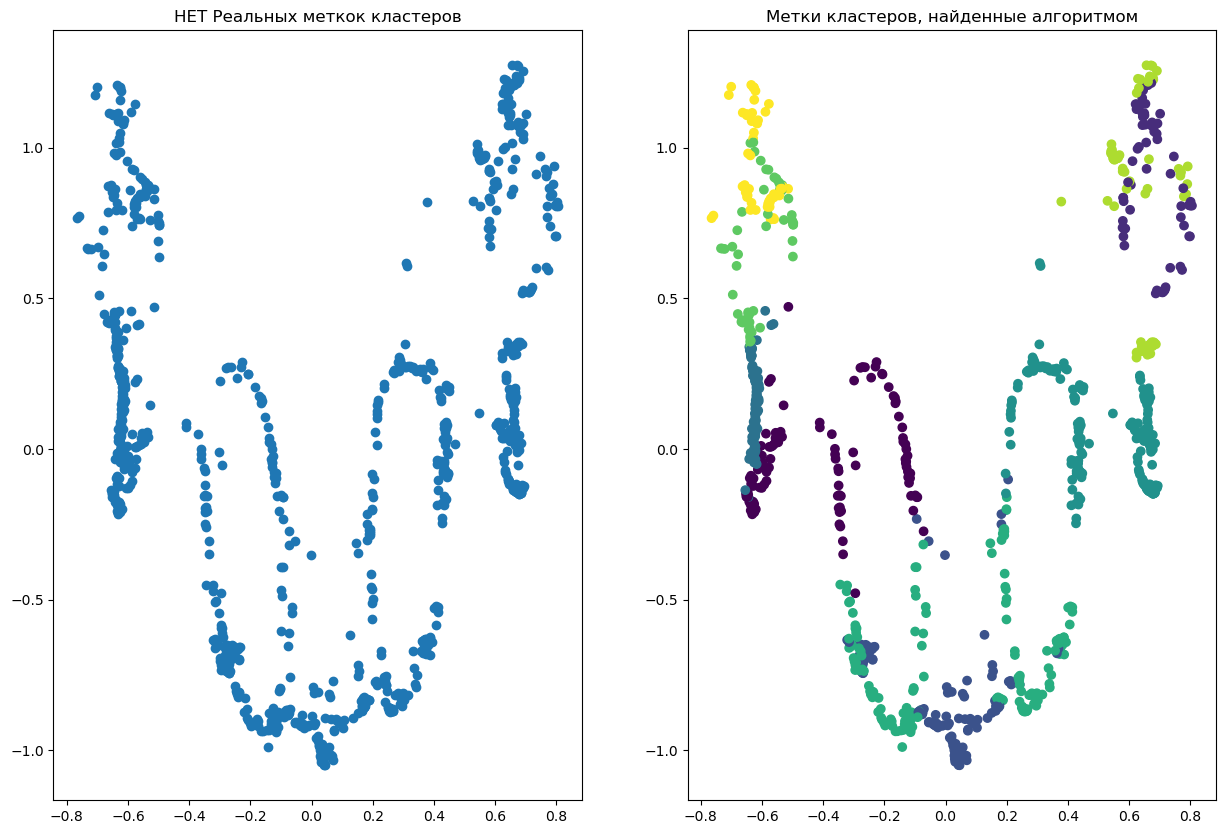

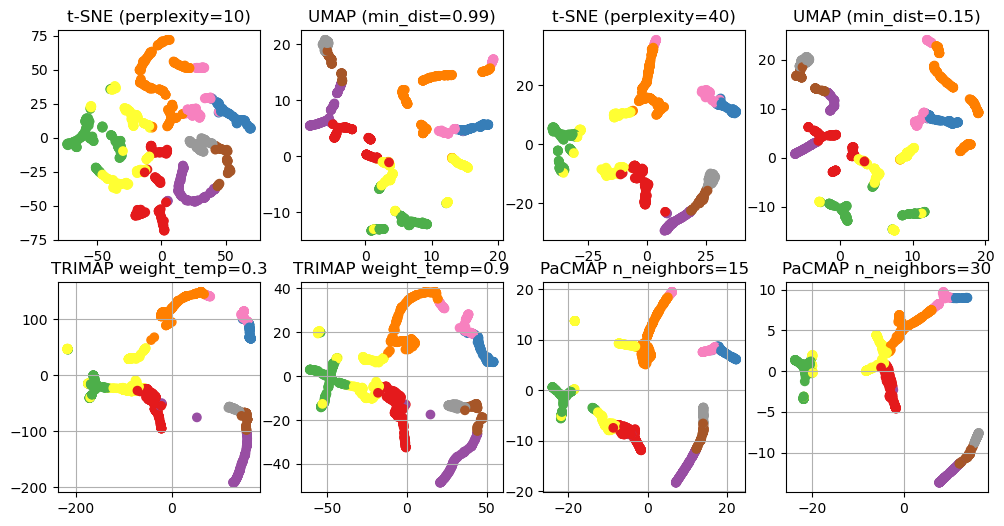

In [146]:
cluster_num = 7

cluster_labels_kmeans = plot_it(scaled_data_m, "k-means")

plot_scatter(scaled_data_m, None, cluster_labels_kmeans, cluster_num)

plot_reduce(scaled_data_m, cluster_labels_kmeans, cluster_num)

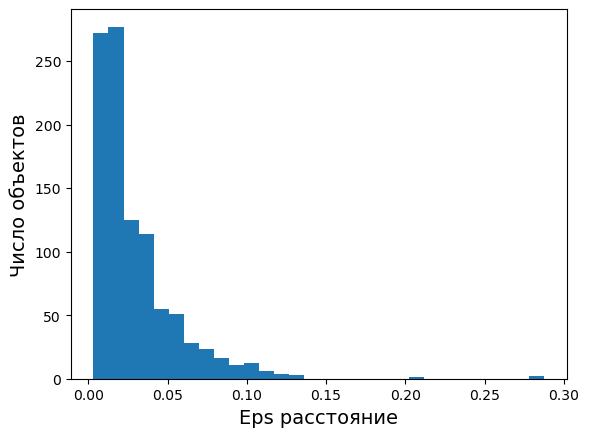

In [147]:
# Расчет k-го ближайшего расстояния
eps_dist = calculate_kn_distance(scaled_data_m, 5)

# Построение гистограммы
plt.hist(eps_dist, bins=30)
plt.ylabel('Число объектов', size=14)
plt.xlabel('Eps расстояние', size=14)
plt.show()